# Critical Curves and Caustics with VBBL

In [166]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import VBBinaryLensing

# VBBL setup
VBBL = VBBinaryLensing.VBBinaryLensing()
a1 = 0.5  # limb-darkening
VBBL.RelTol = 1e-03
VBBL.a1 = a1

In [167]:
s = 1.0
q = 0.4
rho = 0.5

solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBBinaryLensing.VBBinaryLensing._sols'>


In [168]:
# generator function iterating over _sols, _curve, or _point objects 
# making use of the next keyword
def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

In [169]:
alpha = -3.0*np.pi/4.0
u0 = 0.1
mt = np.cos(alpha)/np.sin(alpha)
mu0 = -1.0/mt
phi = np.arctan(mu0)
print(mt, mu0, alpha*180/np.pi, phi*180/np.pi)
c = u0*np.cos(phi)-mt*u0*np.sin(phi)
print('trajectory: y = %1.2fx + %1.2f' %(mt, c))
print('u0        : y = %1.2fx' %(mu0))

0.9999999999999999 -1.0000000000000002 -135.0 -45.00000000000001
trajectory: y = 1.00x + 0.14
u0        : y = -1.00x


xmin: -2.0 -2.0 -2.353553390593274
xmin: 1.6464466094067263 -2.0 1.6464466094067263
xmin: -2.0 -2.0 -2.7071067811865475
xmin: 1.2928932188134525 -2.0 1.2928932188134525
xmin: -2.0 -2.0 -3.0606601717798214
xmin: 0.9393398282201786 -2.0 0.9393398282201786
xmin: -2.0 -2.0 -3.414213562373095
xmin: 0.5857864376269051 -2.0 0.5857864376269051
(1000,) (1000,)
(1000,) (1000,)
(1000,) (1000,)
(1000,) (1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,) 2.575846116613311
(1000,) 2.326096366863561
(1000,) 2.076346617113811
(1000,) 1.826596867364062
(1000,) (1000,)


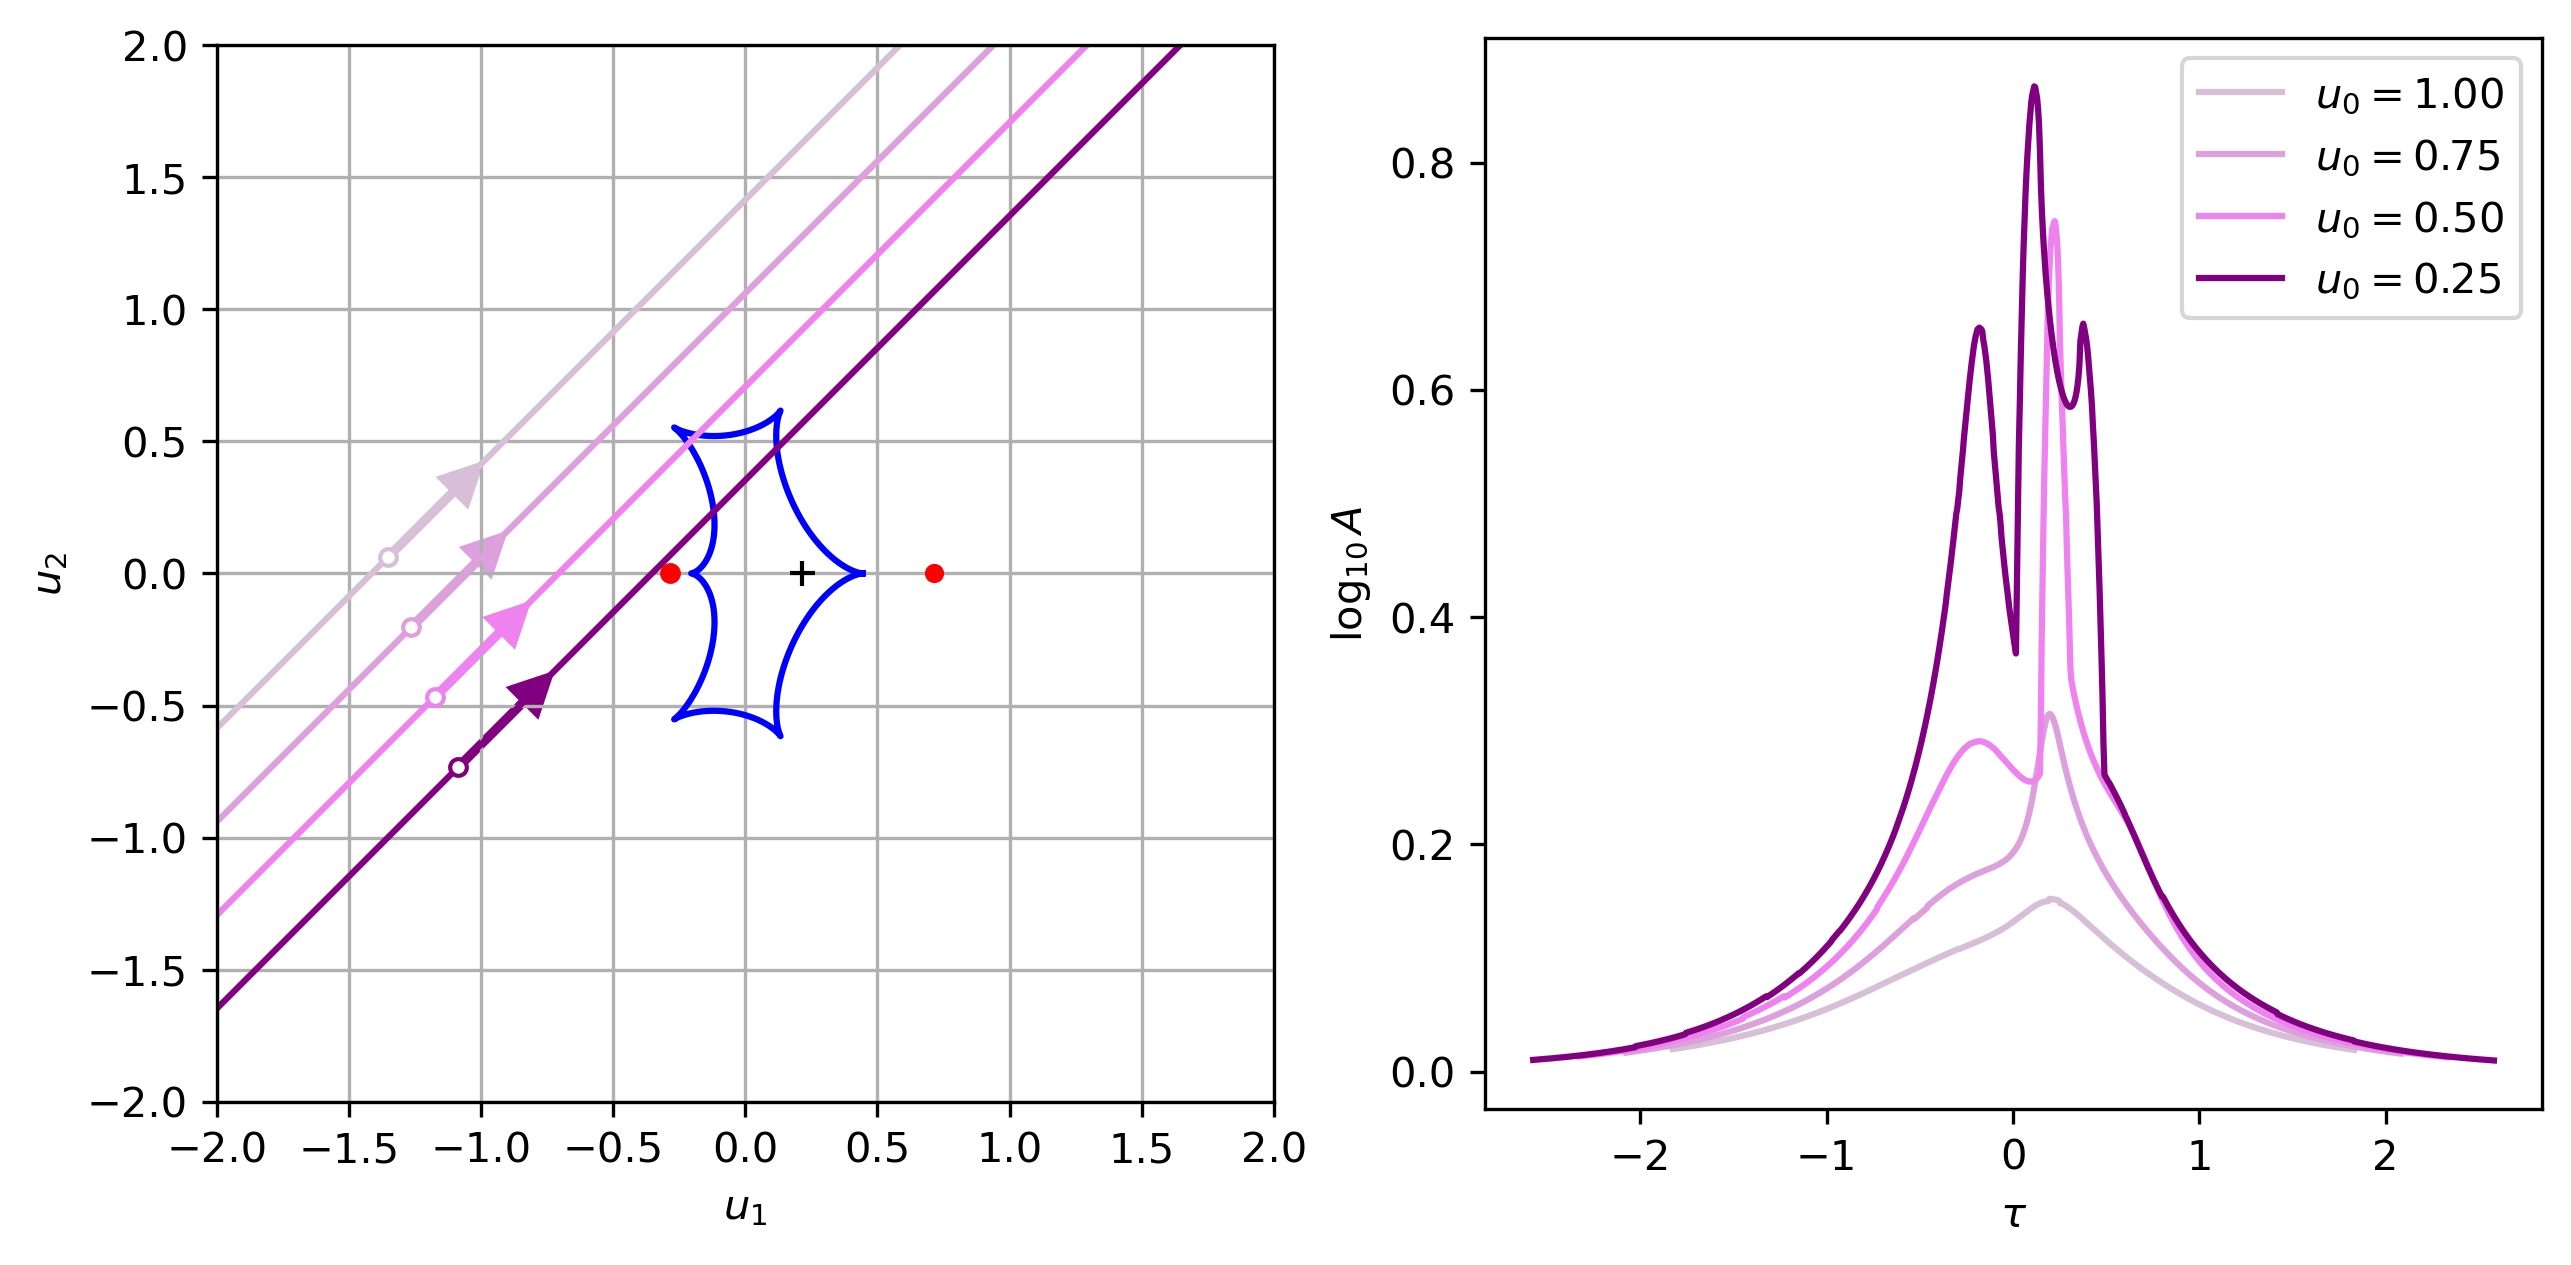

In [177]:
#plot bounds
xlims = (-2.0,2.0)
ylims = (-2.0,2.0)

# Conversion from centre-of-mass to mid-point coordinates
a = 0.5*s
b = a*(1.0-q)/(1.0+q)
#alpha = -np.pi/2.0  # straight down
#alpha = 0.0 # left to right
#alpha = -np.pi  # right to left
#alpha = np.pi/2.0  # straight up
alpha = np.pi/4.0 # other
# problem w pi/2
h = b*np.cos(alpha)
s = 1.0
q = 0.4
rho = 0.05  # source radius in Einstein radii of the total mass.

solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))     
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

#individual trajectory elements
t1color, t1u0 = 'purple', 0.25
t2color, t2u0 = 'violet', 0.5
t3color, t3u0 = 'plum', 0.75
t4color, t4u0 = 'thistle', 1.0

def near_equal(x, x_ref, tolerance=0.0001):
    if (x < x_ref+tolerance) and (x > x_ref-tolerance):
        return True
    else:
        return False

def get_trajectory(u0, alpha, xlims, ylims, n=1000):

    phi = alpha + np.pi/2.0  # angle of u0 vector
    #phi = alpha - np.pi/2.0  # to swap the direction of u0

    #dealing with extreme cases
    if near_equal(alpha, 0.0):  # left to right
        xs = [-np.inf, np.inf]
        ys = False
        mt = 0
        c = u0*np.sin(phi)
    elif near_equal(alpha, np.pi) or near_equal(alpha, -np.pi):  # right to left
        xs = [-np.inf, np.inf]
        ys = False
        mt = 0
        c = u0*np.sin(phi)
    elif near_equal(alpha, np.pi/2.0) or near_equal(alpha, -3.0*np.pi/2.0):  # top to bottom
        ys = [-np.inf, np.inf]
        xs = False
        mt = -np.inf
        c = None
    elif near_equal(alpha, -np.pi/2.0) or near_equal(alpha, 3.0*np.pi/2.0):  # bottom to top
        ys = [-np.inf, np.inf]
        xs = False
        mt = np.inf
        c = None
    elif near_equal(alpha, -2.0*np.pi) or near_equal(alpha, 2.0*np.pi):  # left to right
        xs = [-np.inf, np.inf]
        ys = False
        mt = 0
        c = u0*np.sin(phi)

    #normal cases
    else:
        #common trajectory elements
        mt = np.sin(alpha)/np.cos(alpha)  # gradient of the trejectory line
        mu0 = -1.0/mt  # gradient of the u0 vector (normal to the trajectory)

        # c is the y intercept of the trajectory
        c = u0*np.sin(phi) - mt * u0*np.cos(phi)  # c = y - mx
                                                  # x = (y-c)/m

        if (mt >= -1.0) and (mt <= 1.0): # more across than up and down
            xs = [(ylims[0]-c)/mt,(ylims[1]-c)/mt]  # min and max on plot but don't know 
                                                    # which is which
            ys = False
        else:  # more up and down than across
            ys = [mt*xlims[0]+c, mt*xlims[1]+c]  # y = mx + c
            xs = False

    #trajectory points
    if c is None:
        y = np.linspace(ylims[0], ylims[1], n)  # the order doean't matter. 
                                                # I sort it out elsewhere
        x = y*0.0 + u0*np.cos(phi)  # y*0.0 is to make sure x is an array like y
    elif not(ys):
        #plot bounds for the trajectories       
        xmin = np.max([xlims[0],np.min(xs)])  # must be in a list or np.min and np.max shit
        xmax = np.min([xlims[1],np.max(xs)])  # the bed
        print('xmin:', np.max([xlims[0],np.min(xs)]), xlims[0], np.min(xs))
        print('xmin:', np.min([xlims[1],np.max(xs)]), xlims[0], np.max(xs))

        x = np.linspace(xmin, xmax, n)
        y = mt*x+c
    elif not(xs):
        #plot bounds for the trajectories       
        ymin = np.max([ylims[0],np.min(ys)])  # must be in a list or np.min and np.max shit
        ymax = np.min([ylims[1],np.max(ys)])  # the bed
        print('ymin:', np.max([ylims[0],np.min(ys)]), xlims[0], np.min(ys))
        print('ymax:', np.min([ylims[1],np.max(ys)]), xlims[0], np.max(ys))

        y = np.linspace(ymin, ymax, n)
        x = (y-c)/mt

    return x, y

t1x, t1y = get_trajectory(t1u0, alpha, xlims, ylims)
t2x, t2y = get_trajectory(t2u0, alpha, xlims, ylims)
t3x, t3y = get_trajectory(t3u0, alpha, xlims, ylims)
t4x, t4y = get_trajectory(t4u0, alpha, xlims, ylims)
print(t1x.shape, t1y.shape)
print(t2x.shape, t2y.shape)
print(t3x.shape, t3y.shape)
print(t4x.shape, t4y.shape)

#Lightcurves
def get_mag(s, q, x, y, rho, gamma=0.2, epsilon=1.0e-3):
    VBBL.a1 = gamma
    VBBL.Tol = epsilon
    A = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if rho==0:
            A[i] = VBBL.BinaryMag0(s, q, x[i], y[i])
        else:
            A[i] = VBBL.BinaryMagDark(s, q, x[i], y[i], rho, gamma)
        #A[i] = VBBL.BinaryMag2(s, q, x[i], y[i], rho)
    return A

At1 = get_mag(s, q, t1x, t1y, rho)
At2 = get_mag(s, q, t2x, t2y, rho)
At3 = get_mag(s, q, t3x, t3y, rho)
At4 = get_mag(s, q, t4x, t4y, rho)
print(At1.shape)
print(At2.shape)
print(At3.shape)
print(At4.shape)

def get_t(x, y, alpha):
    ''' finds arbitraty t set, corresponding to x and y coordinates, using alpha to determine
        which side the trajectory starts from. This function avoid what should be negative 
        t values ending up positive, creating a fold in the magnification curve.'''
    alpha = alpha%(2.0*np.pi)

    #delta x
    if (alpha >= -np.pi/2.0) and (alpha <= np.pi/2.0):
        x1 = np.min(x)
    else:
        x1 = np.max(x)
    dx = x - x1

    if ((0.0 <= alpha)  and (alpha <= np.pi)) or ((-2.0*np.pi <= alpha) and (alpha <= -np.pi)):
        y1 = np.min(y)
    else:
        y1 = np.max(y)
    dy = y - y1

    dt = np.sqrt(dx**2+dy**2)
    return dt

#t
t1dt, t2dt = get_t(t1x, t1y, alpha), get_t(t2x, t2y, alpha)
t3dt, t4dt = get_t(t3x, t3y, alpha), get_t(t4x, t4y, alpha)
print(t1dt.shape)
print(t2dt.shape)
print(t3dt.shape)
print(t4dt.shape)

def get_t0(x, y, t):
    '''finds the t values for the "epoch" with the closest approach to the COM. 
    Note that this "t0" isn't ecaxtly t0, but it is good enough for demonstrative plots.'''
    u = np.sqrt(x**2 + y**2)  # directionless distance from the origin (COM)
    u0_index = np.argmin(u)  # epoch with the smallest u
    t0 = t[u0_index]  # t at u_min
    return t0

t1t0, t2t0 = get_t0(t1x, t1y, t1dt), get_t0(t2x, t2y, t2dt)
t3t0, t4t0 = get_t0(t3x, t3y, t3dt), get_t0(t4x, t4y, t4dt)

#t'
t1t = t1dt-t1t0
t2t = t2dt-t2t0
t3t = t3dt-t3t0
t4t = t4dt-t4t0
print(t1t.shape, t1t0)
print(t2t.shape, t2t0)
print(t3t.shape, t3t0)
print(t4t.shape, t4t0)

#Plotting
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(10, 5))

#plot components
ax[0].plot(caustic_curves[:, 0], caustic_curves[:, 1], 'b-')  # caustic
ax[0].plot(t1x, t1y, marker='', ls='-', c=t1color)  # trajectories
ax[0].plot(t2x, t2y, marker='', ls='-', c=t2color)
ax[0].plot(t3x, t3y, marker='', ls='-', c=t3color)
ax[0].plot(t4x, t4y, marker='', ls='-', c=t4color)
# lightcurves (technically, manification curves)
ax[1].plot(t4t, np.log10(At4), marker='', ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[1].plot(t3t, np.log10(At3), marker='', ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[1].plot(t2t, np.log10(At2), marker='', ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[1].plot(t1t, np.log10(At1), marker='', ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0) 
print(t1t.shape, np.log10(At4).shape)


#Aesthetics
ax[0].grid(True)
ax[0].set_aspect('equal')  # Equal in x and y
ax[0].plot(b, 0, marker='+', c='k')  # COM
#lens objects
ax[0].plot(-a+b, 0, marker='o', c='red', ms=np.log10(10000.0))  # lens object 1
ax[0].plot(a+b, 0, marker='o', c='red', ms=np.log10(10000.0*q))  # lens object 2
#source sizes
rho_index = int(t1x.shape[0]*1.0/4.0)
ax[0].plot(t1x[rho_index], t1y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t1color, ms=rho*80)
ax[0].plot(t2x[rho_index], t2y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t2color, ms=rho*80)
ax[0].plot(t3x[rho_index], t3y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t3color, ms=rho*80)
ax[0].plot(t4x[rho_index], t4y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t4color, ms=rho*80)
#trajectory directions

t_len = 0.5
ax[0].arrow(t1x[rho_index], t1y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t1color)
ax[0].arrow(t2x[rho_index], t2y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t2color)
ax[0].arrow(t3x[rho_index], t3y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t3color)
ax[0].arrow(t4x[rho_index], t4y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t4color)
#axis labels
ax[0].set_ylabel(r'$u_{2}$')
ax[0].set_xlabel(r'$u_{1}$')
ax[1].set_aspect(6.1)  # manually forcing the magnification curve to be the same 
                        # size as the caustic diagram
ax[1].set_ylabel(r'$\log_{10}A$')
ax[1].set_xlabel(r'$\tau$')
ax[1].legend()  # u0=...

#set plot bounds
ax[0].set_xlim(xlims[0],xlims[1])
ax[0].set_ylim(ylims[0],ylims[1])

#save
plt.savefig('binary_trajectories_FS.png', bbox_inches='tight')  # 'tight' removes outer padding

I don't know if the u0's are defined right, but they are continuous.

(1000,)
(1000,)
(1000,)
(1000,)


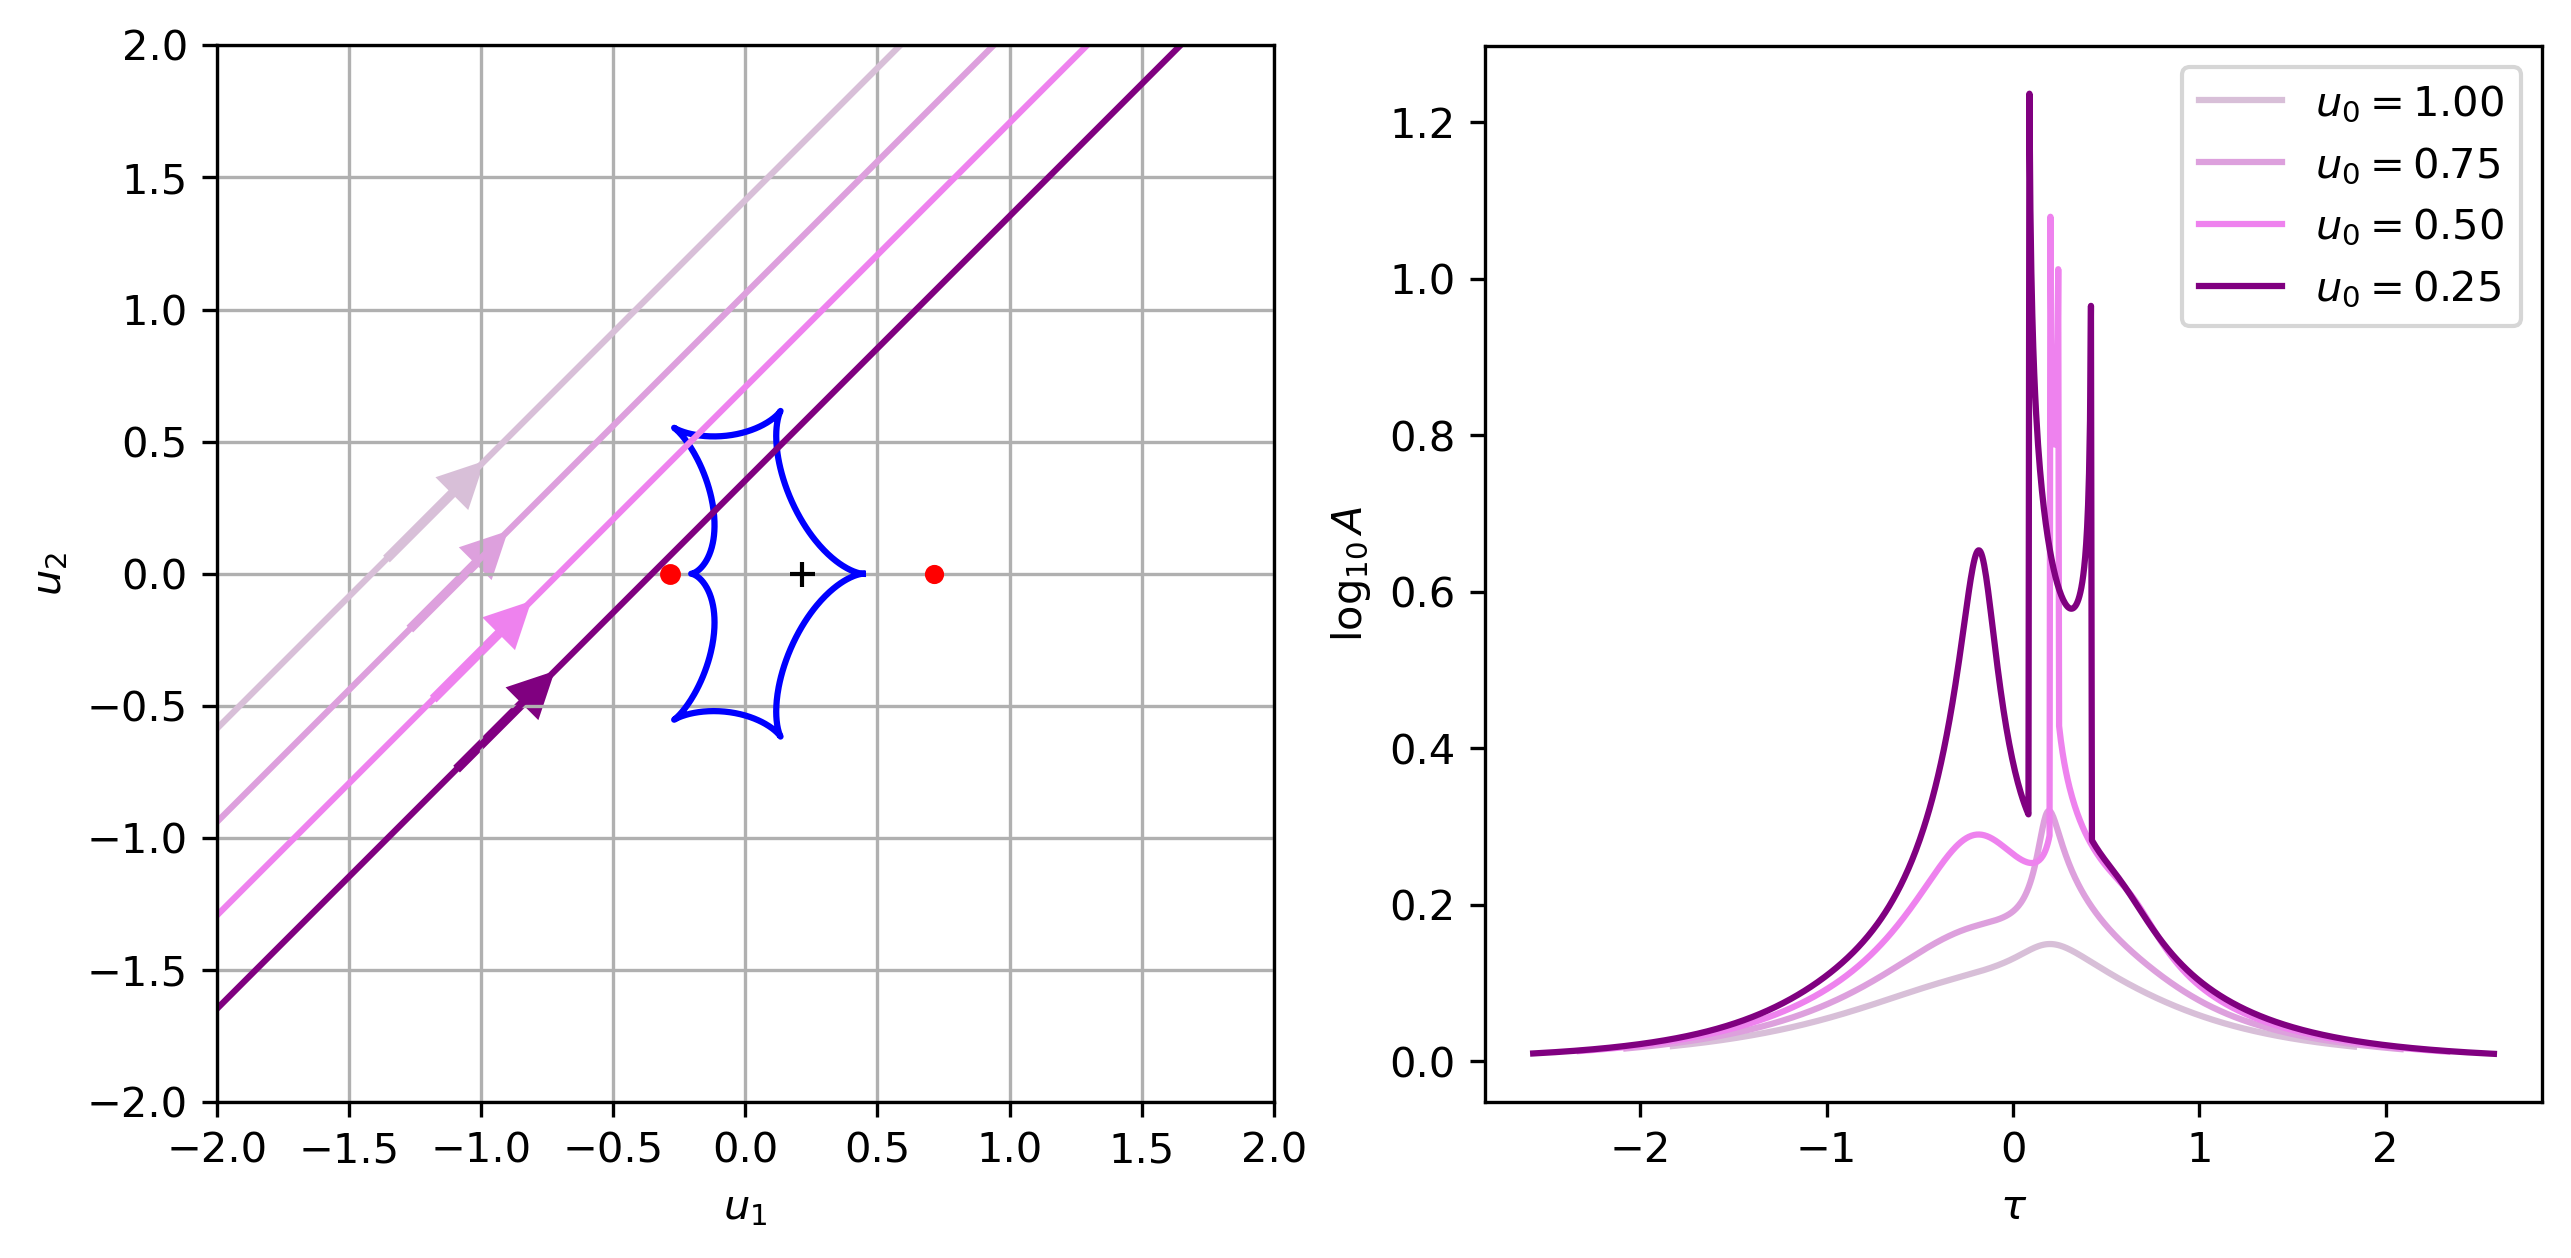

In [185]:
# point source
#rho = 0  # source radius in Einstein radii of the total mass.

#plot bounds
xlims = (-2.0,2.0)
ylims = (-2.0,2.0)

#Lightcurves
At1FS = get_mag(s, q, t1x, t1y, 0.0)
At2FS = get_mag(s, q, t2x, t2y, 0.0)
At3FS = get_mag(s, q, t3x, t3y, 0.0)
At4FS = get_mag(s, q, t4x, t4y, 0.0)
print(At1FS.shape)
print(At2FS.shape)
print(At3FS.shape)
print(At4FS.shape)

#Plotting
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(10, 5))

#plot components
ax[0].plot(caustic_curves[:, 0], caustic_curves[:, 1], 'b-')  # caustic
ax[0].plot(t1x, t1y, marker='', ls='-', c=t1color)  # trajectories
ax[0].plot(t2x, t2y, marker='', ls='-', c=t2color)
ax[0].plot(t3x, t3y, marker='', ls='-', c=t3color)
ax[0].plot(t4x, t4y, marker='', ls='-', c=t4color)
# lightcurves (technically, manification curves)
ax[1].plot(t4t, np.log10(At4FS), marker='', ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[1].plot(t3t, np.log10(At3FS), marker='', ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[1].plot(t2t, np.log10(At2FS), marker='', ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[1].plot(t1t, np.log10(At1FS), marker='', ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0) 

#Aesthetics
ax[0].grid(True)
ax[0].set_aspect('equal')  # Equal in x and y
ax[0].plot(b, 0, marker='+', c='k')  # COM
#lens objects
ax[0].plot(-a+b, 0, marker='o', c='red', ms=np.log10(10000.0))  # lens object 1
ax[0].plot(a+b, 0, marker='o', c='red', ms=np.log10(10000.0*q))  # lens object 2
#arrows
rho_index = int(t1x.shape[0]*1.0/4.0)
t_len = 0.5
ax[0].arrow(t1x[rho_index], t1y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t1color)
ax[0].arrow(t2x[rho_index], t2y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t2color)
ax[0].arrow(t3x[rho_index], t3y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t3color)
ax[0].arrow(t4x[rho_index], t4y[rho_index], t_len*np.cos(alpha), t_len*np.sin(alpha)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t4color)
#axis labels
ax[0].set_ylabel(r'$u_{2}$')
ax[0].set_xlabel(r'$u_{1}$')
ax[1].set_aspect(4.2)  # manually forcing the magnification curve to be the same 
                        # size as the caustic diagram
ax[1].set_ylabel(r'$\log_{10}A$')
ax[1].set_xlabel(r'$\tau$')
ax[1].legend()  # u0=...

#set plot bounds
ax[0].set_xlim(xlims[0],xlims[1])
ax[0].set_ylim(ylims[0],ylims[1])

#save
plt.savefig('binary_trajectories_PS.png', bbox_inches='tight')  # 'tight' removes outer padding

## Single Lens

xmin: -2.0 -2.0 -inf
xmin: 2.0 -2.0 inf
xmin: -2.0 -2.0 -inf
xmin: 2.0 -2.0 inf
xmin: -2.0 -2.0 -inf
xmin: 2.0 -2.0 inf
xmin: -2.0 -2.0 -inf
xmin: 2.0 -2.0 inf
(1000,) (1000,)
(1000,) (1000,)
(1000,) (1000,)
(1000,) (1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,) 1.997997997997998
(1000,) 1.997997997997998
(1000,) 1.997997997997998
(1000,) 1.997997997997998


C:\Users\amber\AppData\Local\Temp\ipykernel_1672\1825909026.py:78: RuntimeWarning: invalid value encountered in sqrt
  u1 = uq*np.cos(theta_1d) - np.sqrt(rho**2 - uq**2 * np.sin(theta_1d)**2) + epsilon
C:\Users\amber\AppData\Local\Temp\ipykernel_1672\1825909026.py:79: RuntimeWarning: invalid value encountered in sqrt
  u2 = uq*np.cos(theta_1d) + np.sqrt(rho**2 - uq**2 * np.sin(theta_1d)**2) - epsilon
C:\Users\amber\AppData\Local\Temp\ipykernel_1672\1825909026.py:93: RuntimeWarning: invalid value encountered in sqrt
  (1.0-gamma*(1.0-1.5*np.sqrt(1.0-(r**2-2.0*r*uq*np.cos(theta)+uq**2)/rho**2)  ))


(1000,)
(1000,)
(1000,)
(1000,)
(1000,) (1000,)


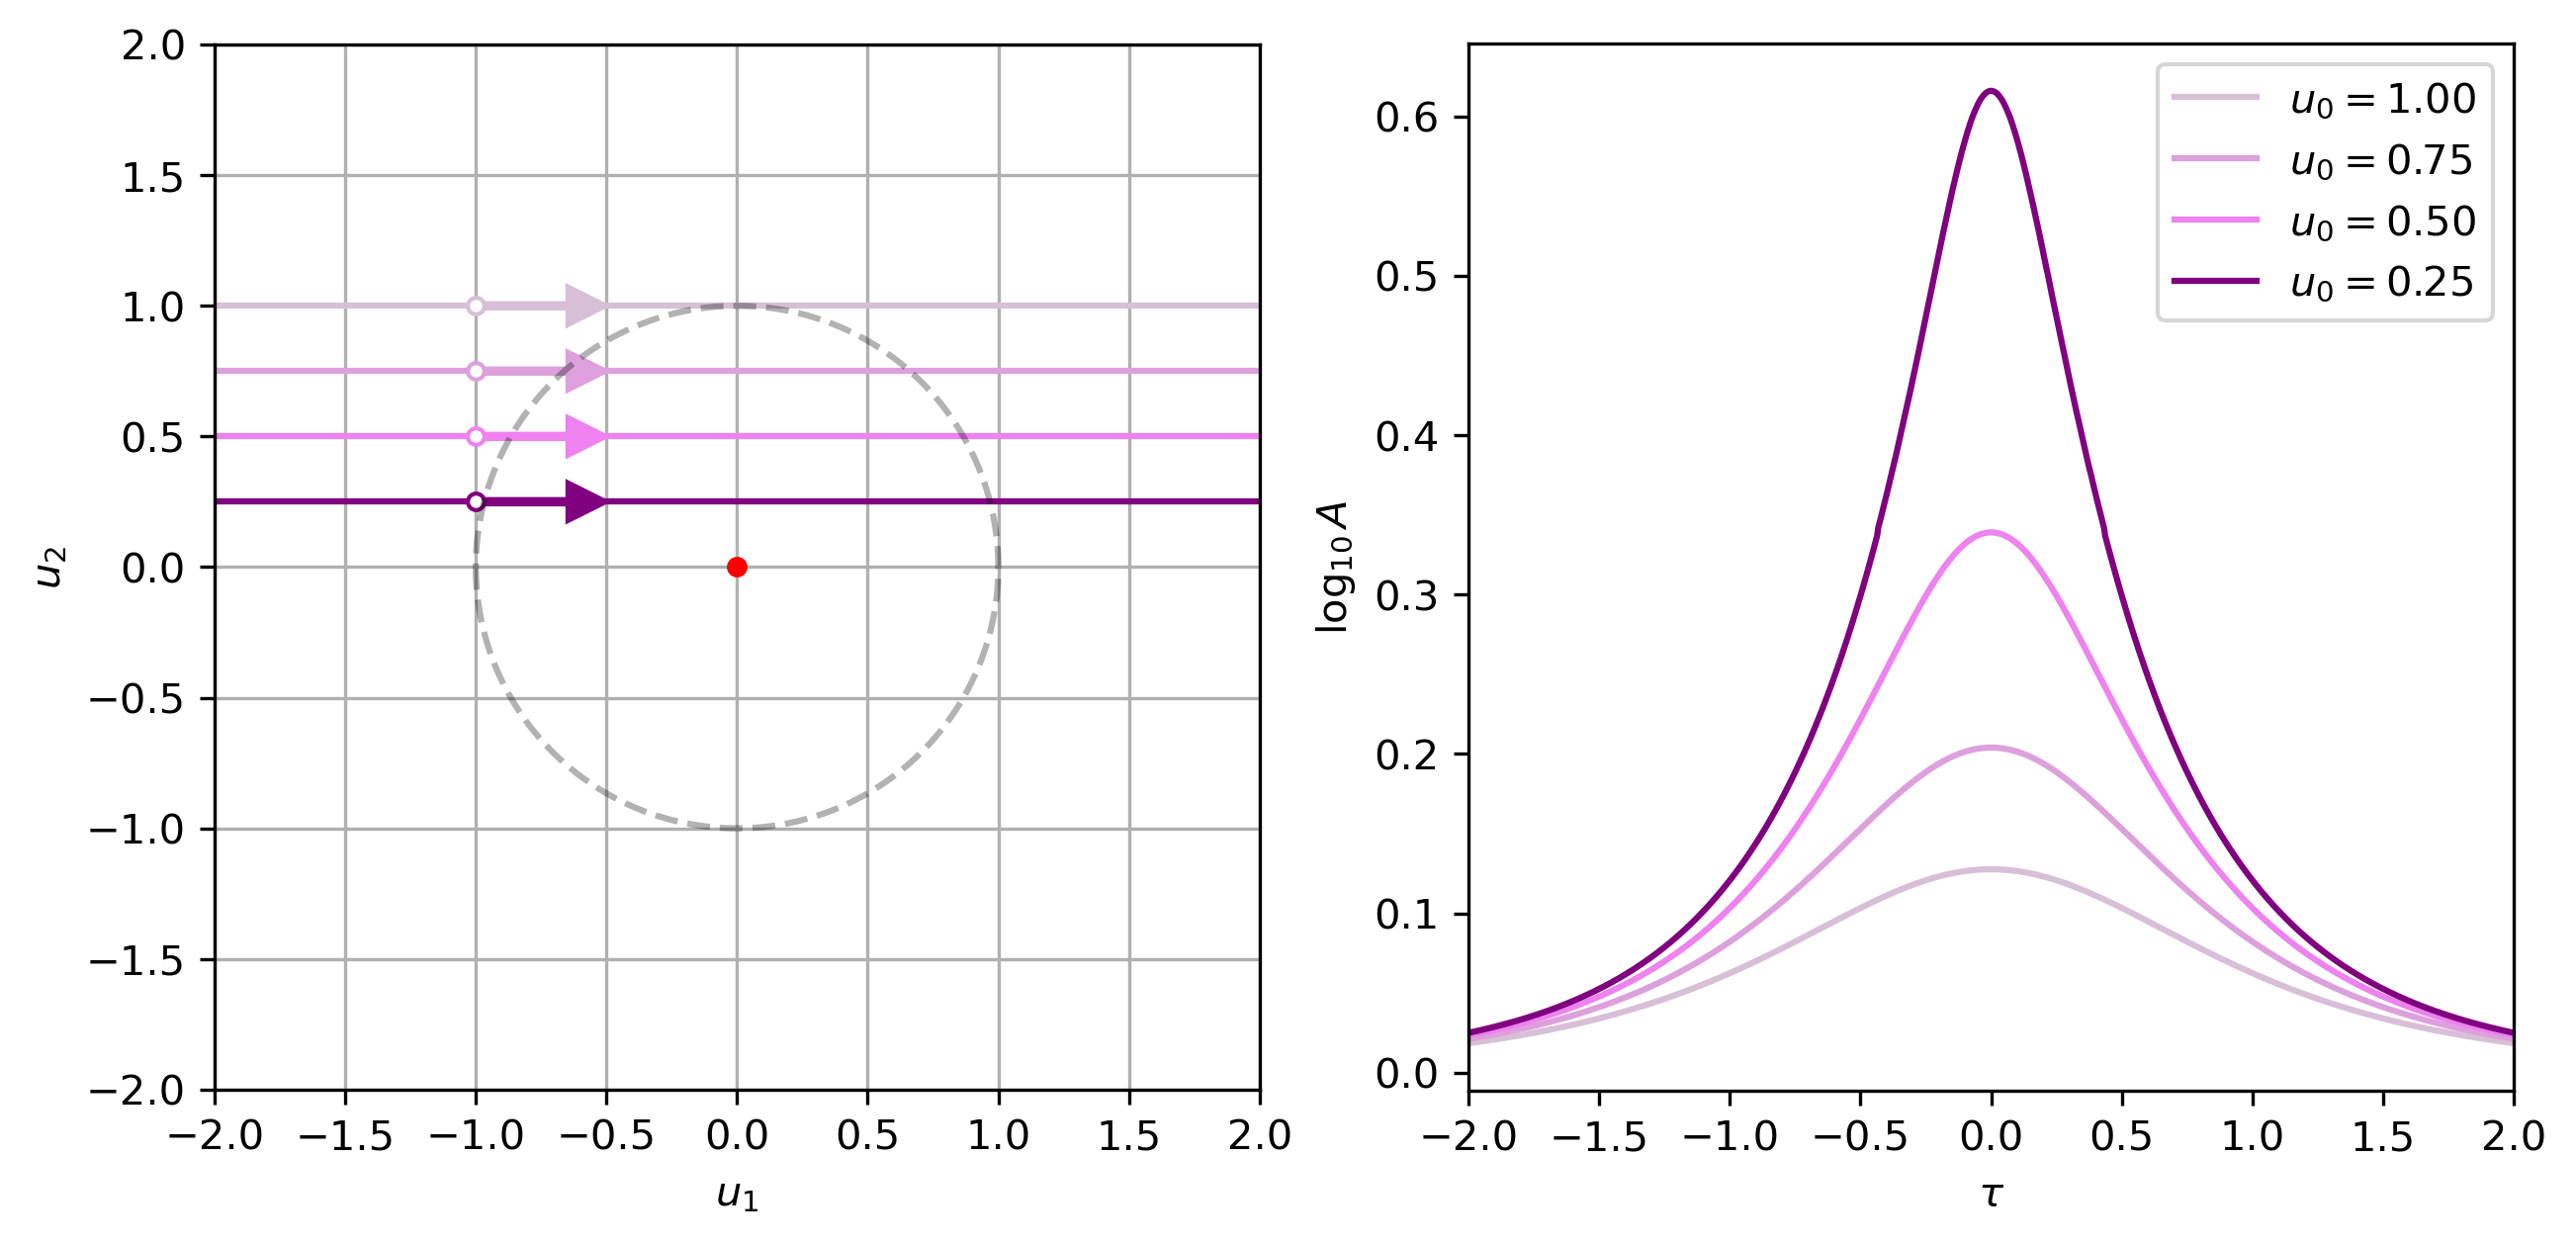

In [184]:
#finite source
SLrho = 0.05  # source radius in units of theta_E

#plot bounds
xlims = (-2.0,2.0)
ylims = (-2.0,2.0)

# alpha = 0.0 # left to right

SLt1x, SLt1y = get_trajectory(t1u0, 0.0, xlims, ylims)
SLt2x, SLt2y = get_trajectory(t2u0, 0.0, xlims, ylims)
SLt3x, SLt3y = get_trajectory(t3u0, 0.0, xlims, ylims)
SLt4x, SLt4y = get_trajectory(t4u0, 0.0, xlims, ylims)
print(SLt1x.shape, SLt1y.shape)
print(SLt2x.shape, SLt2y.shape)
print(SLt3x.shape, SLt3y.shape)
print(SLt4x.shape, SLt4y.shape)

#t
SLt1dt, SLt2dt = get_t(SLt1x, SLt1y, 0.0), get_t(SLt2x, SLt2y, 0.0)
SLt3dt, SLt4dt = get_t(SLt3x, SLt3y, 0.0), get_t(SLt4x, SLt4y, 0.0)
print(SLt1dt.shape)
print(SLt2dt.shape)
print(SLt3dt.shape)
print(SLt4dt.shape)

SLt1t0, SLt2t0 = get_t0(SLt1x, SLt1y, SLt1dt), get_t0(SLt2x, SLt2y, SLt2dt)
SLt3t0, SLt4t0 = get_t0(SLt3x, SLt3y, SLt3dt), get_t0(SLt4x, SLt4y, SLt4dt)

#t'
SLt1t = SLt1dt-SLt1t0
SLt2t = SLt2dt-SLt2t0
SLt3t = SLt3dt-SLt3t0
SLt4t = SLt4dt-SLt4t0
print(SLt1t.shape, SLt1t0)
print(SLt2t.shape, SLt2t0)
print(SLt3t.shape, SLt3t0)
print(SLt4t.shape, SLt4t0)

#Magnification Function - stolen from Michael's SL fitter
def SL_magnification(t, u0, t0, tE, rho, n=300, gamma=0.2, epsilon=1.0e-3):
    '''
    n: finite source integration subintervals
    gamma: limb-darkening index
    '''
    tau = (t-t0)/tE
    u = np.sqrt(u0**2+tau**2)
    A = (u**2 + 2.0)/(u*np.sqrt(u**2+4.0))

    if rho!=0:
        #  This is from Lee et al. (2009) ApJ, 695, 200 
        # Set up 2d Simpsons Rule matrix
        X = np.ones(n+1)
        c2 = np.arange(n//2-1)*2 + 2
        c4 = np.arange(n//2)*2 + 1
        X[c2] = 2
        X[c4] = 4
        xx, yy = np.meshgrid(X,X)
        S = xx*yy
    
        z = np.abs(u)/rho
        fs_points = np.where(z < 10.0)[0]

        for q in range(len(fs_points)):
            uq = u[fs_points[q]]

            if  uq <= rho:
                theta_1d = np.arange(n+1)*np.pi/n
                theta = np.broadcast_to(theta_1d,(n+1,n+1)).T
                delta_theta = np.pi/n
                u1 = 0.0*theta_1d
                u2 = uq*np.cos(theta_1d) + np.sqrt(rho**2 - uq**2 * np.sin(theta_1d)**2) - epsilon

            else:
                theta_1d = np.arange(n+1)*np.pi/(2.0*n)
                theta = np.broadcast_to(theta_1d,(n+1,n+1)).T
                delta_theta = np.pi/(2.0*n)
                u1 = uq*np.cos(theta_1d) - np.sqrt(rho**2 - uq**2 * np.sin(theta_1d)**2) + epsilon
                u2 = uq*np.cos(theta_1d) + np.sqrt(rho**2 - uq**2 * np.sin(theta_1d)**2) - epsilon

            u1[theta_1d>np.arcsin(rho/uq)] = 0.0
            u2[theta_1d>np.arcsin(rho/uq)] = 0.0
            uu1 = np.broadcast_to(u1,(n+1,n+1)).T
            uu2 = np.broadcast_to(u2,(n+1,n+1)).T

            r = np.broadcast_to(np.arange(n+1),(n+1,n+1))*(uu2-uu1)/n + uu1
            delta_r = np.ones_like(r)
            delta_r[:,1:-1] = 0.5*(r[:,2:] - r[:,:-2])
            delta_r[:,0] = 0.5*(r[:,1] - r[:,0])
            delta_r[:,-1] = 0.5*(r[:,-1] - r[:,-2])

            integrand = ((r**2+2.0)/np.sqrt(r**2+4.0)) * \
                        (1.0-gamma*(1.0-1.5*np.sqrt(1.0-(r**2-2.0*r*uq*np.cos(theta)+uq**2)/rho**2)  ))
            integrand[np.isnan(integrand)] = 0.0
            A[fs_points[q]] = np.sum(S*integrand*delta_r)/np.sum(S*r*delta_r)

        #  This is from Gould (1994) ApJ, 421, L71
        # z = np.abs(u)/rho
        # fs_points = np.where(z < 50.0)[0]
        # print 'fs_points', fs_points
        # print 'z[fs_points]', z[fs_points]
        # B0 = 4 * z[fs_points] * self._ellipe_interpolator(z[fs_points]) / np.pi
        # A[fs_points] *= B0

    return A

#Lightcurves
SLAt1 = SL_magnification(SLt1dt, t1u0, SLt1t0, 1, SLrho)
SLAt2 = SL_magnification(SLt2dt, t2u0, SLt2t0, 1, SLrho)
SLAt3 = SL_magnification(SLt3dt, t3u0, SLt3t0, 1, SLrho)
SLAt4 = SL_magnification(SLt4dt, t4u0, SLt4t0, 1, SLrho)
print(SLAt1.shape)
print(SLAt2.shape)
print(SLAt3.shape)
print(SLAt4.shape)

#Plotting
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(10, 5))

#plot components
ax[0].plot(SLt1x, SLt1y, marker='', ls='-', c=t1color)  # trajectories
ax[0].plot(SLt2x, SLt2y, marker='', ls='-', c=t2color)
ax[0].plot(SLt3x, SLt3y, marker='', ls='-', c=t3color)
ax[0].plot(SLt4x, SLt4y, marker='', ls='-', c=t4color)
# lightcurves (technically, manification curves)
ax[1].plot(SLt4t, np.log10(SLAt4), marker='', ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[1].plot(SLt3t, np.log10(SLAt3), marker='', ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[1].plot(SLt2t, np.log10(SLAt2), marker='', ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[1].plot(SLt1t, np.log10(SLAt1), marker='', ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0) 
print(SLt1t.shape, np.log10(SLAt4).shape)

#Aesthetics
ax[0].grid(True)
ax[0].set_aspect('equal')  # Equal in x and y
#lens object
ax[0].plot(0, 0, marker='o', c='red', ms=np.log10(10000.0))
#source sizes
rho_index = int(t1x.shape[0]*1.0/4.0)
ax[0].plot(SLt1x[rho_index], SLt1y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t1color, ms=SLrho*80)
ax[0].plot(SLt2x[rho_index], SLt2y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t2color, ms=SLrho*80)
ax[0].plot(SLt3x[rho_index], SLt3y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t3color, ms=SLrho*80)
ax[0].plot(SLt4x[rho_index], SLt4y[rho_index], marker='o', markerfacecolor='white'\
            , markeredgecolor=t4color, ms=SLrho*80)
#trajectory directions

t_len = 0.5
ax[0].arrow(SLt1x[rho_index], SLt1y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t1color)
ax[0].arrow(SLt2x[rho_index], SLt2y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t2color)
ax[0].arrow(SLt3x[rho_index], SLt3y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t3color)
ax[0].arrow(SLt4x[rho_index], SLt4y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t4color)
#axis labels
ax[0].set_ylabel(r'$u_{2}$')
ax[0].set_xlabel(r'$u_{1}$')
ax[1].set_aspect(6.1)  # manually forcing the magnification curve to be the same 
                        # size as the caustic diagram
ax[1].set_ylabel(r'$\log_{10}A$')
ax[1].set_xlabel(r'$\tau$')
ax[1].legend()  # u0=...

#thetaE circle
theta = np.linspace(-np.pi,np.pi,200)
r = 1  # theta_E
# r^2 = x^2 + y^2
x = r * np.cos(theta)
y = r * np.sin(theta)

ax[0].plot(x, y, 'k--', alpha=0.3)

#set plot bounds
ax[0].set_xlim(xlims[0],xlims[1])
ax[0].set_ylim(ylims[0],ylims[1])
ax[1].set_xlim(xlims[0],xlims[1])

#save
plt.savefig('single_trajectories_FS.png', bbox_inches='tight')  # 'tight' removes outer padding

In [12]:
75*6/7


64.28571428571429

(1000,)
(1000,)
(1000,)
(1000,)
(1000,) (1000,)


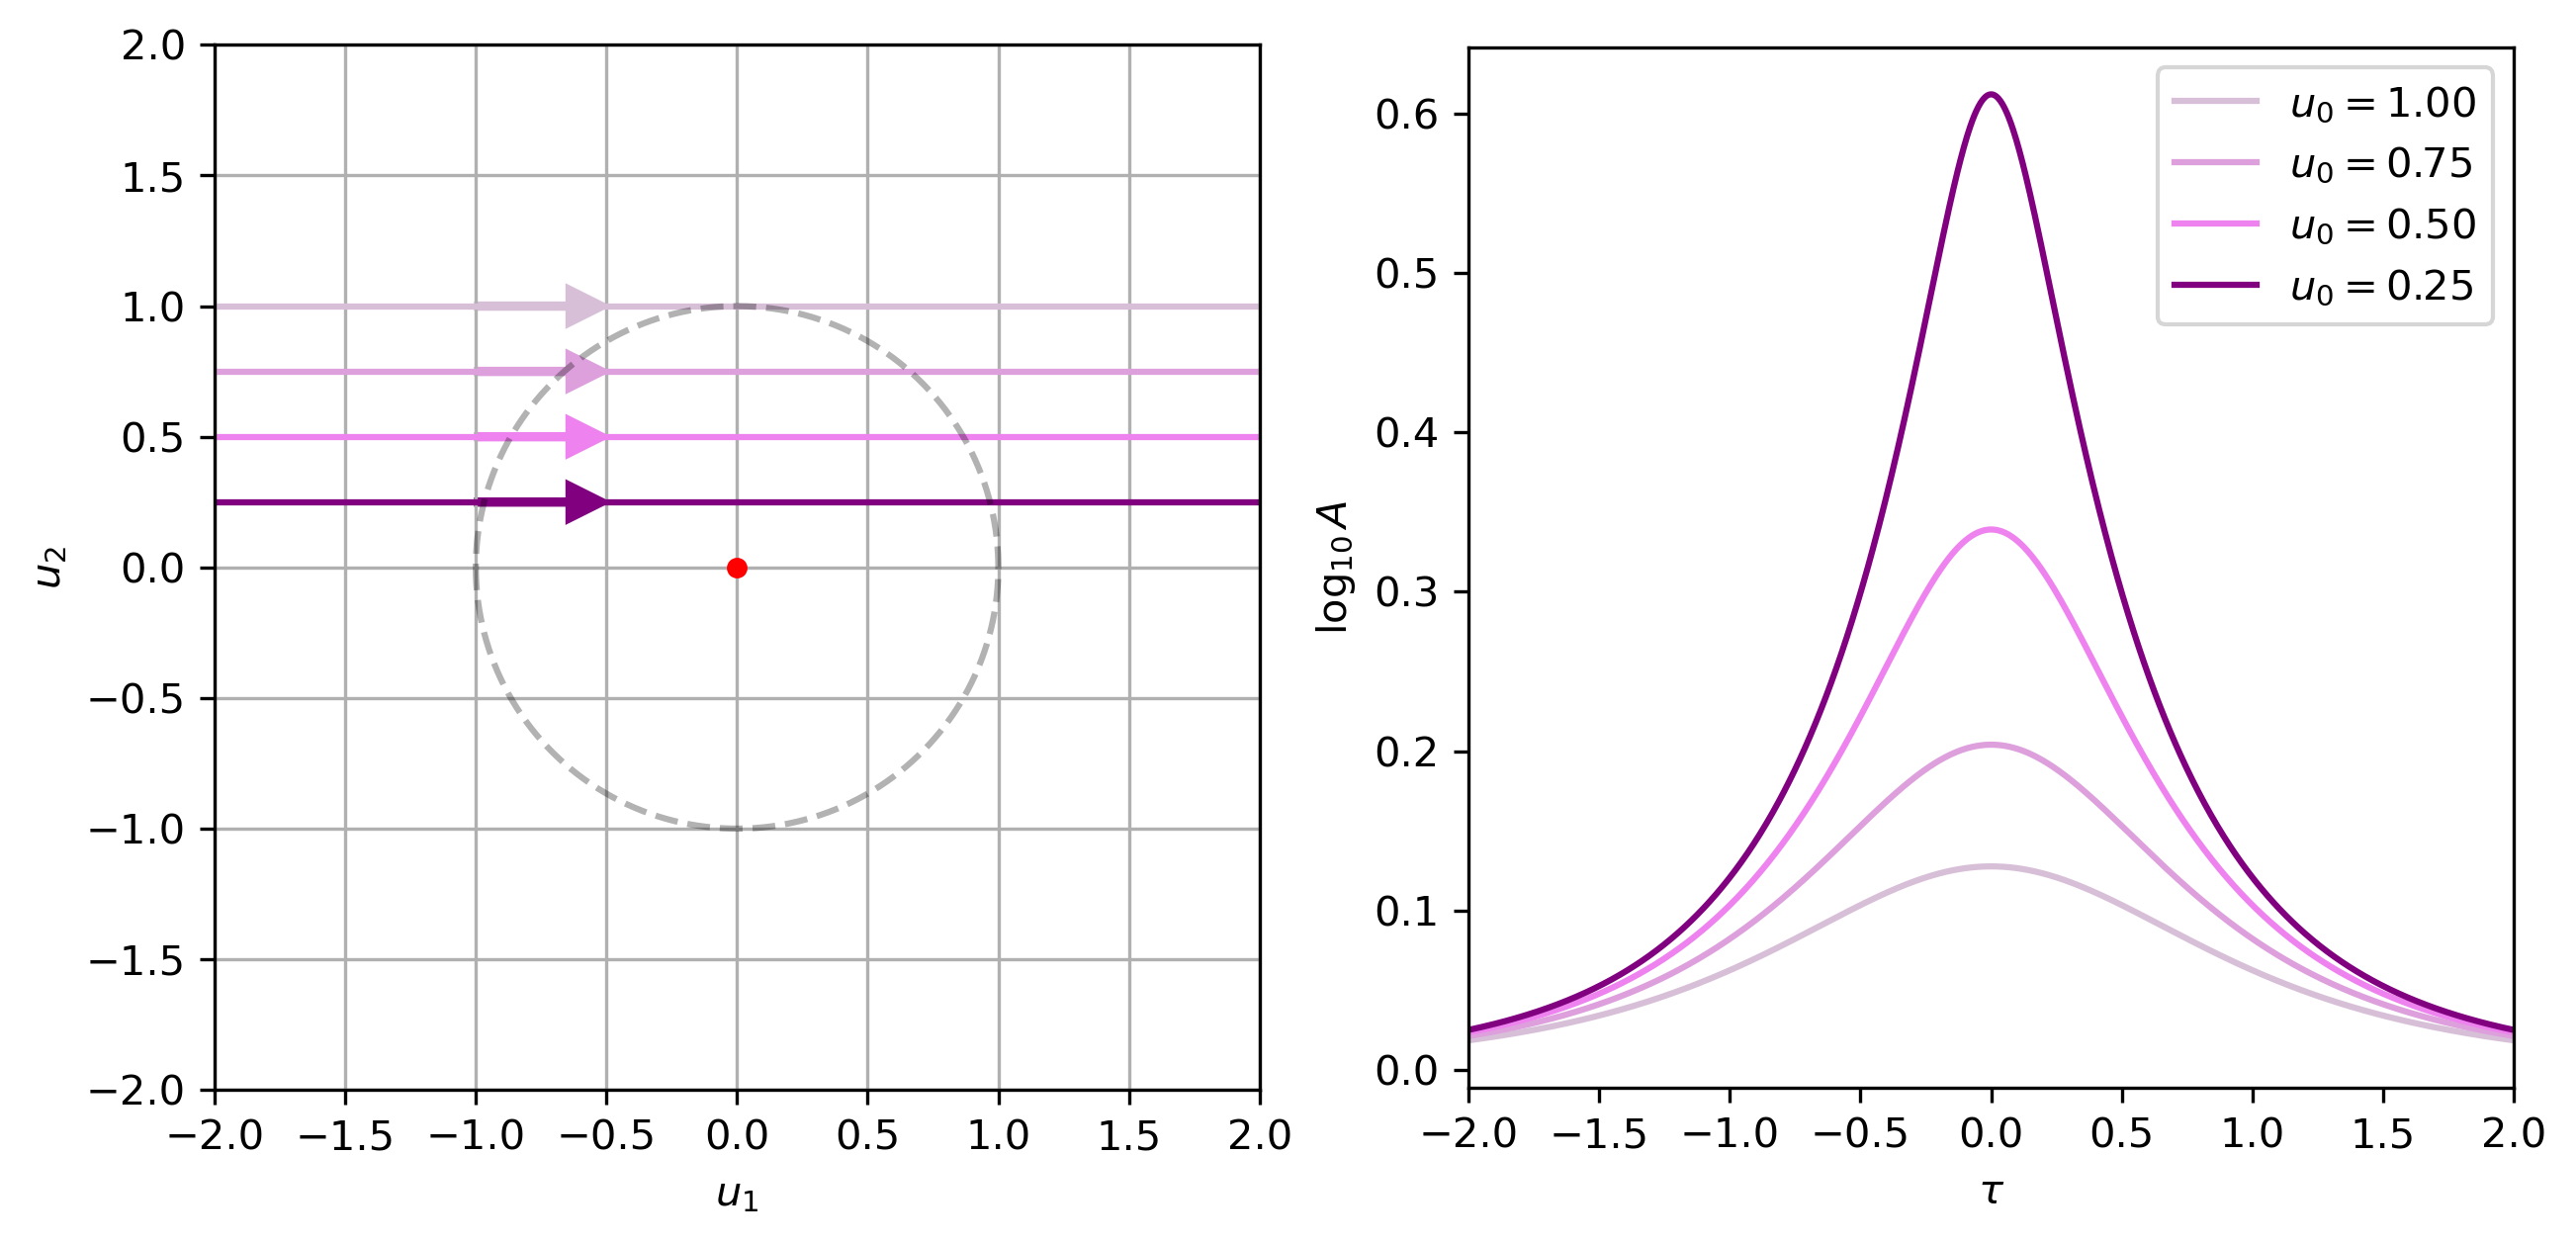

In [181]:
# point source
# rho = 0
# alpha = 0.0 # left to right

#Lightcurves
SLAt1FS = SL_magnification(SLt1dt, t1u0, SLt1t0, 1, 0)
SLAt2FS = SL_magnification(SLt2dt, t2u0, SLt2t0, 1, 0)
SLAt3FS = SL_magnification(SLt3dt, t3u0, SLt3t0, 1, 0)
SLAt4FS = SL_magnification(SLt4dt, t4u0, SLt4t0, 1, 0)
print(SLAt1FS.shape)
print(SLAt2FS.shape)
print(SLAt3FS.shape)
print(SLAt4FS.shape)

#Plotting
fig, ax = plt.subplots(1, 2, dpi=300, figsize=(10, 5))

#plot components
ax[0].plot(SLt1x, SLt1y, marker='', ls='-', c=t1color)  # trajectories
ax[0].plot(SLt2x, SLt2y, marker='', ls='-', c=t2color)
ax[0].plot(SLt3x, SLt3y, marker='', ls='-', c=t3color)
ax[0].plot(SLt4x, SLt4y, marker='', ls='-', c=t4color)
# lightcurves (technically, manification curves)
ax[1].plot(SLt4t, np.log10(SLAt4FS), marker='', ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[1].plot(SLt3t, np.log10(SLAt3FS), marker='', ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[1].plot(SLt2t, np.log10(SLAt2FS), marker='', ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[1].plot(SLt1t, np.log10(SLAt1FS), marker='', ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0) 
print(SLt1t.shape, np.log10(SLAt4FS).shape)

#Aesthetics
ax[0].grid(True)
ax[0].set_aspect('equal')  # Equal in x and y
#lens object
ax[0].plot(0, 0, marker='o', c='red', ms=np.log10(10000.0))
#source sizes
rho_index = int(t1x.shape[0]*1.0/4.0)
#trajectory directions
t_len = 0.5
ax[0].arrow(SLt1x[rho_index], SLt1y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t1color)
ax[0].arrow(SLt2x[rho_index], SLt2y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t2color)
ax[0].arrow(SLt3x[rho_index], SLt3y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t3color)
ax[0].arrow(SLt4x[rho_index], SLt4y[rho_index], t_len*np.cos(0.0), t_len*np.sin(0.0)\
            , head_width=0.15, head_length=0.15, length_includes_head=True, width=0.02\
            , color=t4color)
#axis labels
ax[0].set_ylabel(r'$u_{2}$')
ax[0].set_xlabel(r'$u_{1}$')
ax[1].set_aspect(6.1)  # manually forcing the magnification curve to be the same 
                        # size as the caustic diagram
ax[1].set_ylabel(r'$\log_{10}A$')
ax[1].set_xlabel(r'$\tau$')
ax[1].legend()  # u0=...

#thetaE circle
theta = np.linspace(-np.pi,np.pi,200)
r = 1  # theta_E
# r^2 = x^2 + y^2
x = r * np.cos(theta)
y = r * np.sin(theta)

ax[0].plot(x, y, 'k--', alpha=0.3)

#set plot bounds
ax[0].set_xlim(xlims[0],xlims[1])
ax[0].set_ylim(ylims[0],ylims[1])
ax[1].set_xlim(xlims[0],xlims[1])

#save
plt.savefig('single_trajectories_PS.png', bbox_inches='tight')  # 'tight' removes outer padding

## Finite Source Effects

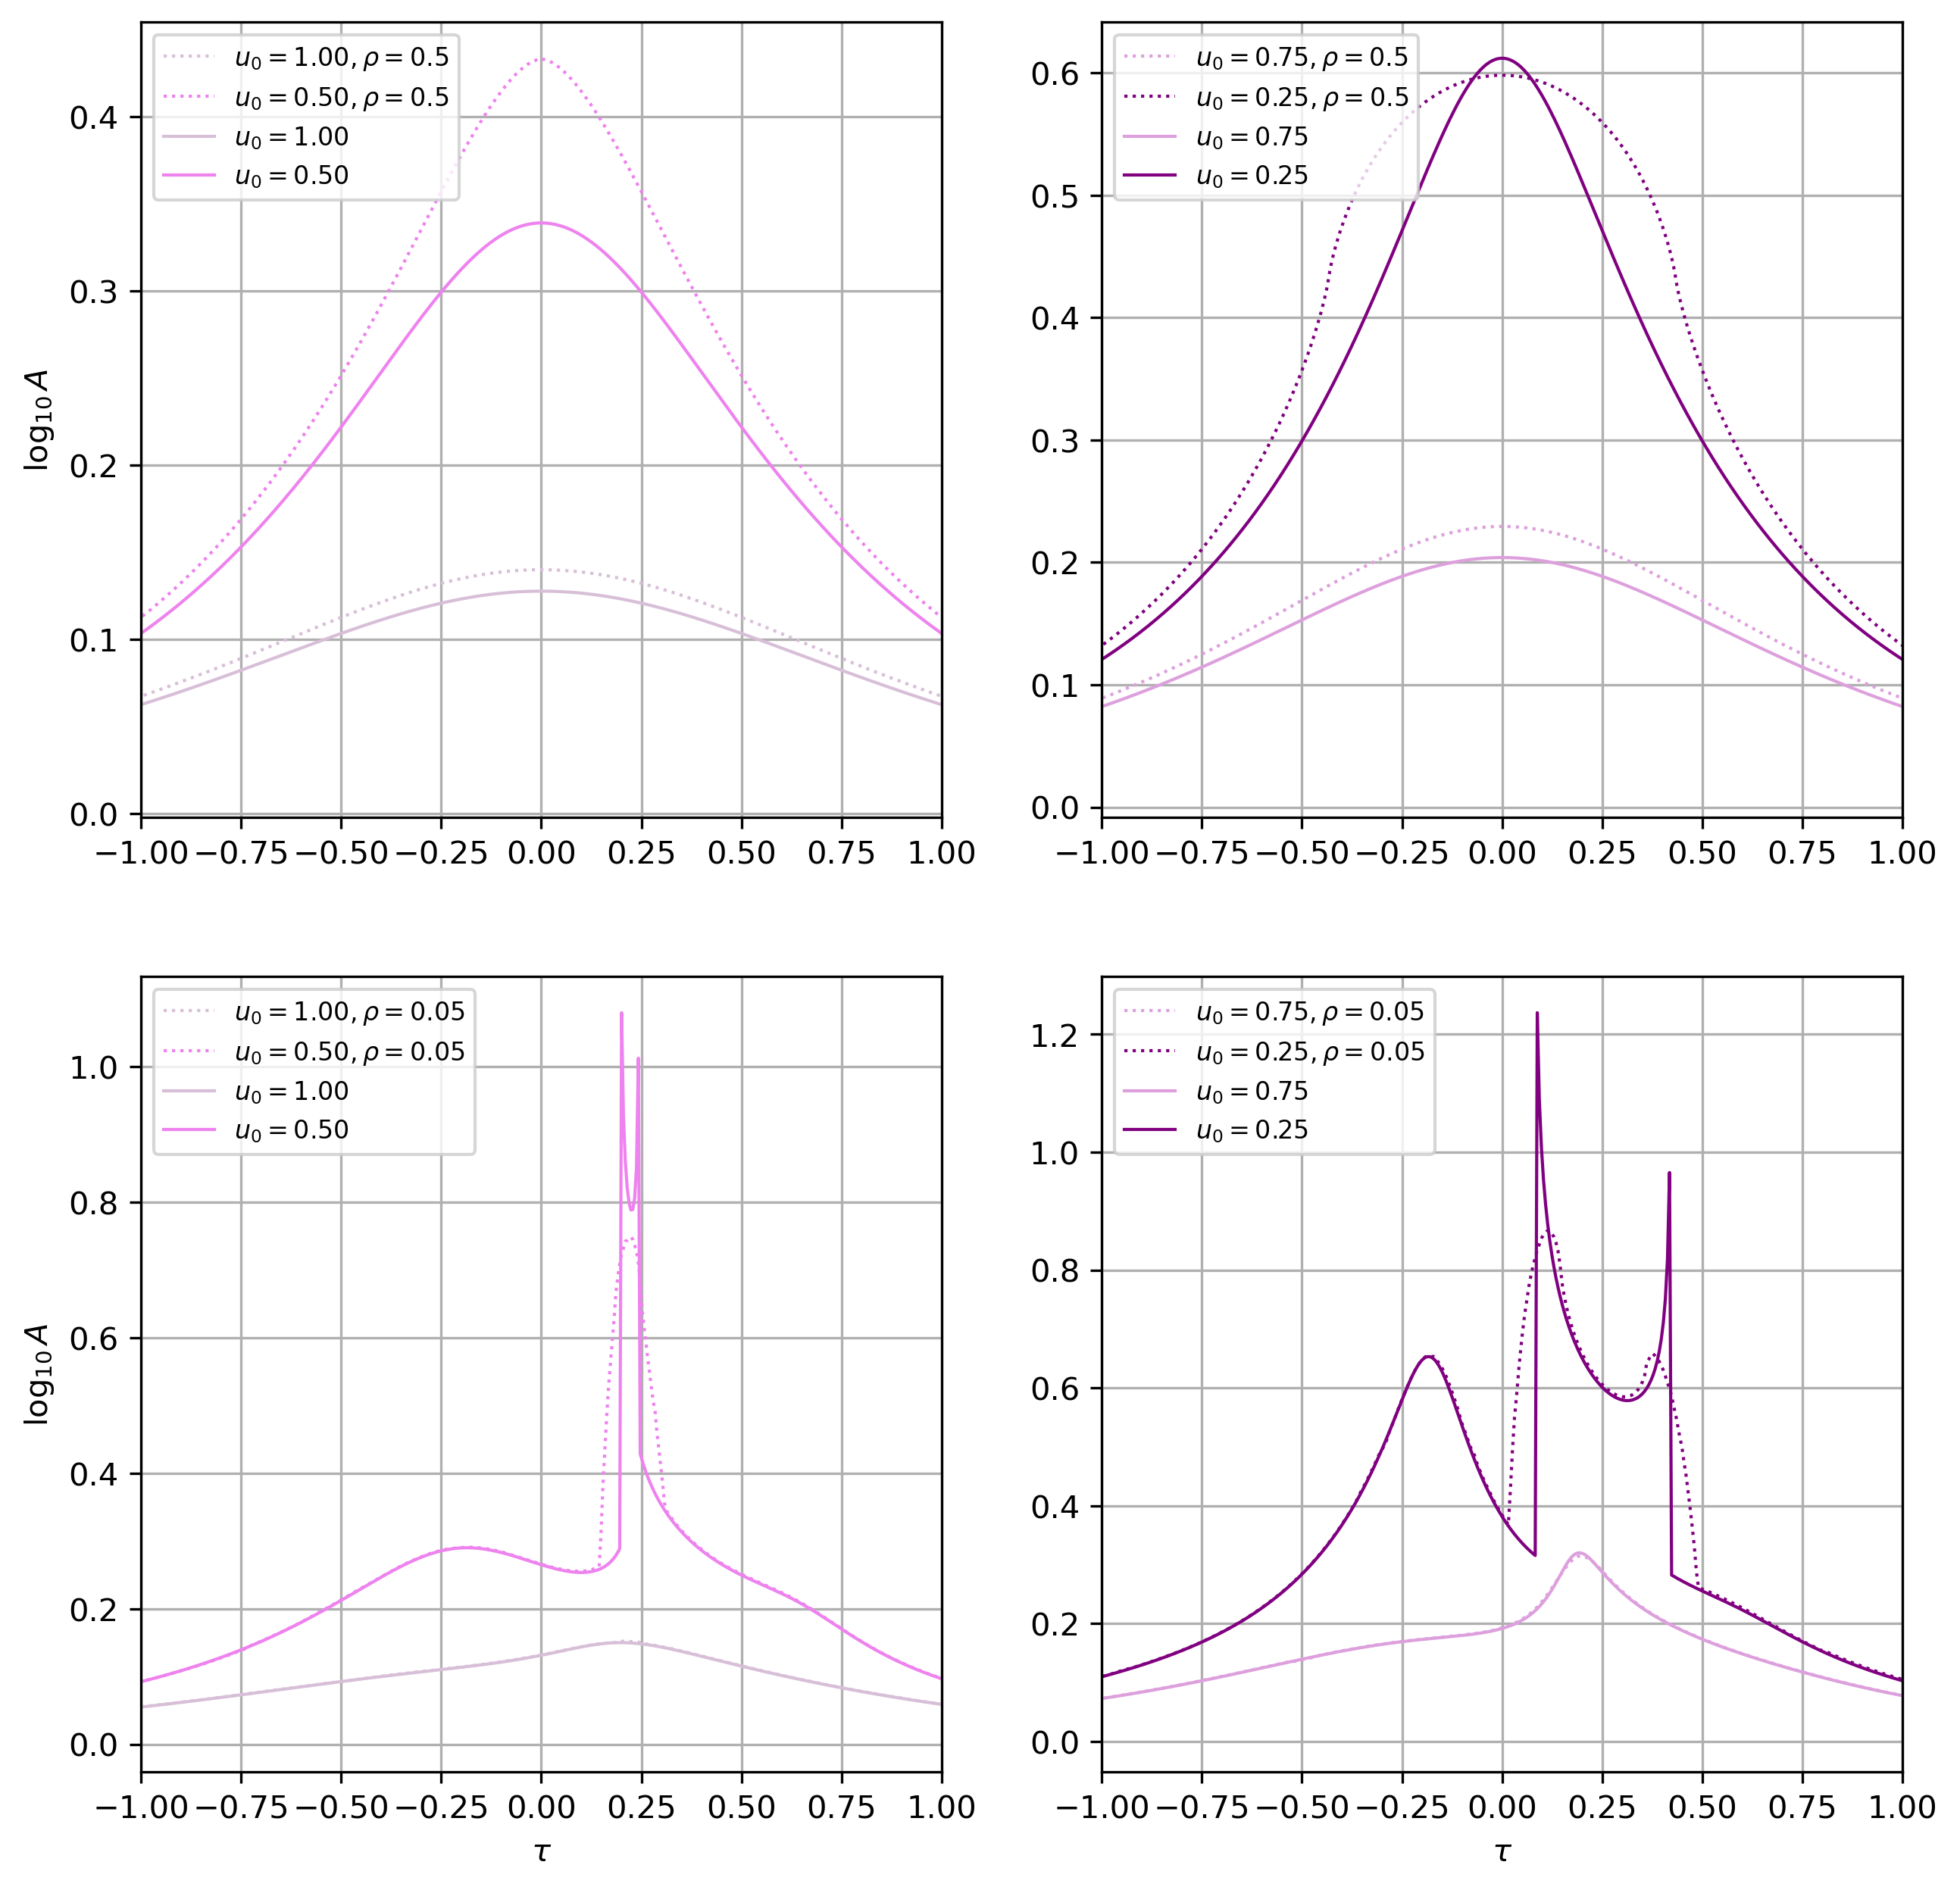

In [182]:
#Plotting
fig, ax = plt.subplots(2, 2, dpi=300, figsize=(10, 10))

# FSBL lightcurves (technically, manification curves)
ax[1][0].plot(t4t, np.log10(At4), marker='', lw=1, ls=':', c=t4color, label=r'$u_0=%1.2f, \rho=%1.2f$' %(t4u0,rho)) 
ax[1][1].plot(t3t, np.log10(At3), marker='', lw=1, ls=':', c=t3color, label=r'$u_0=%1.2f, \rho=%1.2f$' %(t3u0,rho)) 
ax[1][0].plot(t2t, np.log10(At2), marker='', lw=1, ls=':', c=t2color, label=r'$u_0=%1.2f, \rho=%1.2f$' %(t2u0,rho)) 
ax[1][1].plot(t1t, np.log10(At1), marker='', lw=1, ls=':', c=t1color, label=r'$u_0=%1.2f, \rho=%1.2f$' %(t1u0,rho)) 

# PSBL lightcurves (technically, manification curves)
ax[1][0].plot(t4t, np.log10(At4FS), marker='', lw=1, ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[1][1].plot(t3t, np.log10(At3FS), marker='', lw=1, ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[1][0].plot(t2t, np.log10(At2FS), marker='', lw=1, ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[1][1].plot(t1t, np.log10(At1FS), marker='', lw=1, ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0)

# FSSL lightcurves (technically, manification curves)
ax[0][0].plot(SLt4t, np.log10(SLAt4), marker='', lw=1, ls=':', c=t4color, label=r'$u_0=%1.2f, \rho=%1.1f$' %(t4u0,SLrho)) 
ax[0][1].plot(SLt3t, np.log10(SLAt3), marker='', lw=1, ls=':', c=t3color, label=r'$u_0=%1.2f, \rho=%1.1f$' %(t3u0,SLrho)) 
ax[0][0].plot(SLt2t, np.log10(SLAt2), marker='', lw=1, ls=':', c=t2color, label=r'$u_0=%1.2f, \rho=%1.1f$' %(t2u0,SLrho)) 
ax[0][1].plot(SLt1t, np.log10(SLAt1), marker='', lw=1, ls=':', c=t1color, label=r'$u_0=%1.2f, \rho=%1.1f$' %(t1u0,SLrho))

# PSSL lightcurves (technically, manification curves)
ax[0][0].plot(SLt4t, np.log10(SLAt4FS), marker='', lw=1, ls='-', c=t4color, label=r'$u_0=%1.2f$' %t4u0) 
ax[0][1].plot(SLt3t, np.log10(SLAt3FS), marker='', lw=1, ls='-', c=t3color, label=r'$u_0=%1.2f$' %t3u0) 
ax[0][0].plot(SLt2t, np.log10(SLAt2FS), marker='', lw=1, ls='-', c=t2color, label=r'$u_0=%1.2f$' %t2u0) 
ax[0][1].plot(SLt1t, np.log10(SLAt1FS), marker='', lw=1, ls='-', c=t1color, label=r'$u_0=%1.2f$' %t1u0)

#Aesthetics
ax[0][0].grid(True)
ax[1][0].grid(True)
ax[0][1].grid(True)
ax[1][1].grid(True)

#axis labels
#ax.set_aspect(3.5)  # manually forcing the magnification curve to be the same 
                        # size as the caustic diagram
ax[0][0].set_ylabel(r'$\log_{10}A$')
ax[1][0].set_ylabel(r'$\log_{10}A$')
ax[1][0].set_xlabel(r'$\tau$')
ax[1][1].set_xlabel(r'$\tau$')
ax[0][0].legend(fontsize=8, loc='upper left')  # u0=...
ax[0][1].legend(fontsize=8, loc='upper left')  # u0=...
ax[1][0].legend(fontsize=8, loc='upper left')  # u0=...
ax[1][1].legend(fontsize=8, loc='upper left')  # u0=...

#set plot bounds
xlims = (-1,1)
ax[0][0].set_xlim(xlims[0],xlims[1])
ax[1][0].set_xlim(xlims[0],xlims[1])
ax[0][1].set_xlim(xlims[0],xlims[1])
ax[1][1].set_xlim(xlims[0],xlims[1])

#save
plt.savefig('finite_source.png', bbox_inches='tight')  # 'tight' removes outer padding

# Microlensing Sensitivity

If I start with the physical params, what single-len (SL) microlesing parameters do I get?

The SL microlensing parameterisation is:
$u_0$, $t_E$, $t_0$.

The higher-order effects are:
$\rho$, ${\vec {\pi }}_{E}={{\tilde {r}}_{E}}^{-1}$.

$$M={\frac {c^{2}}{4G}}\theta _{E}{\tilde {r}}_{E},$$
$$\pi _{L}=\pi _{rel}+\pi _{S},$$
$$\pi _{rel}=\pi _{E}\theta _{E},$$
$$\mu _{L}=\mu _{rel}+\mu _{S},$$
$$\mu _{rel}=\frac{\theta _{E}}{t_{E}}.$$

$$u(t)={\sqrt {u_{0}^{2}+\left({\frac {t-t_{0}}{t_{E}}}\right)^{2}}}.$$
$$A(u)={\frac {u^{2}+2}{u{\sqrt {u^{2}+4}}}}.$$


$$\kappa=\frac{4G}{c^2} \rm{au}$$
$$ M = \frac{\theta _{E}^2}{\kappa\pi_{rel}}$$
$$\theta _{E}= \sqrt{M\kappa\pi_{rel}}$$

What microlensing parameters give a magnification of at least 2?

In [101]:
import numpy as np

def A(u):
    '''Calculate magnification from u.'''
    return (u**2+2.)/(u*np.sqrt(u**2+4.))

def u(t,u0,t0,tE):
    '''Calculates u f for a given time using the microlensing parameters'''
    return np.sqrt(u0**2+((t-t0)/tE)**2)

def Amax(u0,t0,tE):
    '''Calculates Amax for a given set of microlensing parameters'''
    upeak = u(t0,u0,t0,tE)
    Apeak = A(upeak)
    return Apeak

In [102]:
n=100
u01, u0n, tE1, tEn = np.log10(0.01), np.log10(1), np.log10((1./24)/2.), np.log10(300)
print(u01, u0n, tE1, tEn)

-2.0 0.0 -1.6812412373755872 2.4771212547196626


In [103]:
u0s = 10**np.linspace(u01, u0n, n)  # $\theta_E/1000 < u0 < \theta_E$
tEs = 10.**np.linspace(tE1, tEn, n)  # $30\,\rm{min} < t_E < 300\,\rm{days}$ 
                                         # 40 min to 300 days is the extent of microlening events.

parameter_sets = np.vstack(np.meshgrid(u0s,tEs)).reshape(2,-1).T
N_samples, dims = parameter_sets.shape
visibility = np.zeros((N_samples,dims+1))
visibility[:,:dims] = parameter_sets
visibility[:,dims] = Amax(visibility[:,0],0.,visibility[:,1])
print(visibility[:5])


[[1.00000000e-02 2.08333333e-02 1.00003750e+02]
 [1.04761575e-02 2.08333333e-02 9.54587742e+01]
 [1.09749877e-02 2.08333333e-02 9.11203912e+01]
 [1.14975700e-02 2.08333333e-02 8.69792118e+01]
 [1.20450354e-02 2.08333333e-02 8.30262736e+01]]


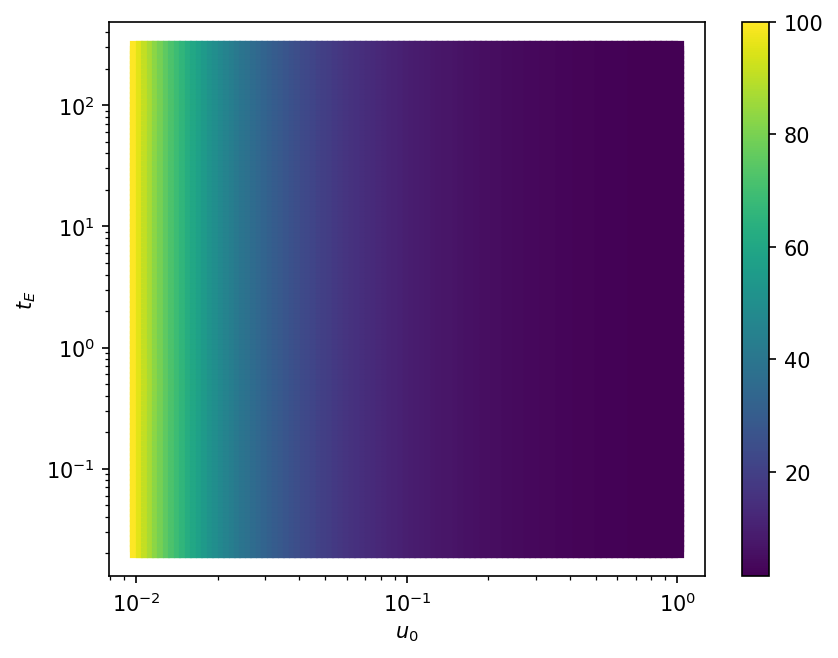

In [104]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(visibility[:,0], visibility[:,1],c=visibility[:,2],marker='s', linewidths=0.1)
plt.colorbar()
plt.xlabel(r'$u_0$')
plt.ylabel(r'$t_E$')
plt.xscale('log')
plt.yscale('log')
plt.show()

Vaying $t_E$ doesn't change Amax. But $\mu _{rel}=\theta _{E}/t_{E}.$ I think maybe $u_0$ can be a dummy parameter too.

In [59]:
theta1, thetan = np.log10(0.1), np.log10(1000)
print(theta1, thetan)

-1.0 3.0


In [105]:
def tE(theta_E,mu_rel):
    ''' '''
    return (theta_E/mu_rel)*365.25

mus = 10**np.linspace(0.1, 15, n)  # mas/yr
thetas = 10**np.linspace(theta1, thetan, n)

parameter_sets = np.vstack(np.meshgrid(mus, thetas)).reshape(2,-1).T

# mesh tEs
tEs= tE(parameter_sets[:,1], parameter_sets[:,0])
print(tEs)

# Amaxs
N_samples, dims = parameter_sets.shape
visibility = np.zeros((N_samples, dims+3))
visibility[:,:dims] = parameter_sets
visibility[:,dims] = tEs
visibility[:,dims+1] = 1./parameter_sets[:,1]  # equal u0 in units of mas not theta_E
visibility[:,dims+2] = Amax(1./parameter_sets[:,1],0.,tEs)  
print(visibility[:5])
print(visibility[-5:])

[2.90128388e+01 2.05156449e+01 1.45070839e+01 ... 7.30466537e-10
 5.16529673e-10 3.65250000e-10]
[[ 1.25892541  0.1        29.01283877 10.          1.00019229]
 [ 1.78034861  0.1        20.51564493 10.          1.00019229]
 [ 2.51773549  0.1        14.50708393 10.          1.00019229]
 [ 3.56053412  0.1        10.25829238 10.          1.00019229]
 [ 5.03524031  0.1         7.25387425 10.          1.00019229]]
[[2.50022906e+14 1.00000000e+03 1.46086615e-09 1.00000000e-03
  1.00000037e+03]
 [3.53577685e+14 1.00000000e+03 1.03301202e-09 1.00000000e-03
  1.00000037e+03]
 [5.00022905e+14 1.00000000e+03 7.30466537e-10 1.00000000e-03
  1.00000037e+03]
 [7.07122977e+14 1.00000000e+03 5.16529673e-10 1.00000000e-03
  1.00000037e+03]
 [1.00000000e+15 1.00000000e+03 3.65250000e-10 1.00000000e-03
  1.00000037e+03]]


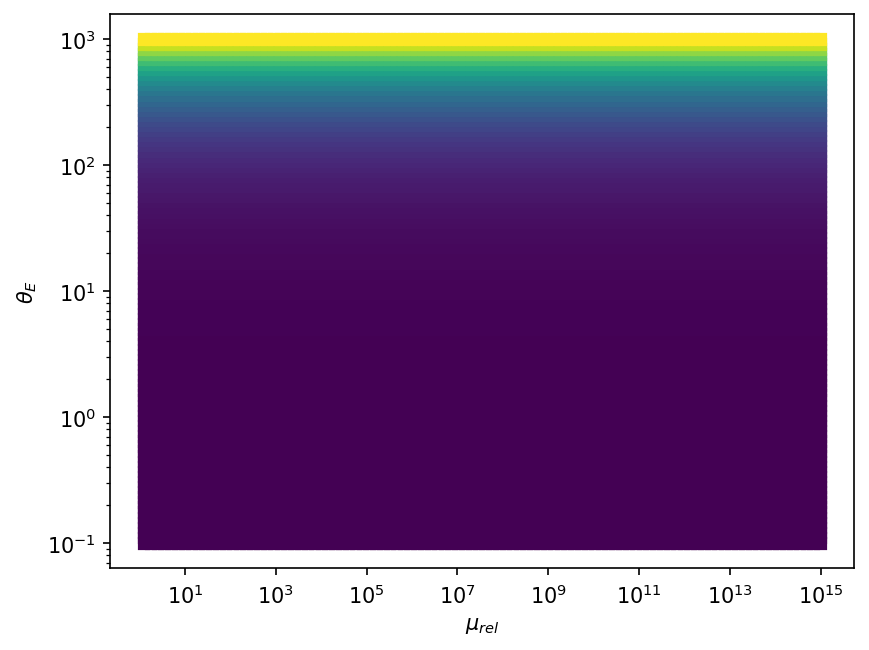

In [106]:
plt.figure(dpi=150)
plt.scatter(visibility[:,0], visibility[:,1],c=visibility[:,-1],marker='s', linewidths=0.1)
#plt.colorbar(legend=r'$A_{max}$')
plt.xlabel(r'$\mu_{rel}$')
plt.ylabel(r'$\theta_E$')
plt.xscale('log')
plt.yscale('log')
plt.show()

$\mu_{rel}$ is just the speed the event happens. It doesn't change $A_{max}$. so $\theta_E$ is effectively a proxy for detetion efficieny if we assume we are always observing. If we don't assume that, $t$, $t_0$, $t_E$, and $\mu_{rel}$ come back in to play (no need for all of them).

The next layer to consider is mass and distance. Lets start with $1\,M_\odot.$

In [107]:

def thetaE(M,pirel_mas):
    ''' find theta_E
    
    Inputs:
    --------
    M:                  arr of float (like theta_E)
                        in Solar masses
    pirel_mas:          arr or flaot
                        mas (milliarcseconds)

    Output:
    --------
    theta_E:            arr or flaot
                        mas (milliarcseconds)
                
    Notes:
    -------
    ..math::
        \theta_E = \sqrt{M\kappa\pi_{rel}},
    where
    ..math::
        \kappa=8.144\,\rm{mas}/M_\odot.
    '''

    # Constants
    kappa = 8.144  # mas/MS
    
    return np.sqrt(M*kappa*pirel_mas)  # M in Jupiter masses


In [108]:
#Lets start with a pi_rel histogram from uniform d
D1, Dn  = 0.01**2, 9**2
print(D1, Dn)

0.0001 81


In [109]:
def pi_rel(DL,DS):
    ''' Find pi_rel

    Inputs:
    --------
    DL:                 arr or float
                        kpc
    DS:                 arr or float
                        default is 8 - galactic center
                        kpc    

    Output:
    --------
    pirel_mas:          arr or flaot
                        mas (milliarcseconds)

                
    Notes:
    -------
    .. math::
        \pi_{rel} = \rm{au}(\frac{1}{D_L}-\frac{1}{D_S}),
    the au just means we are working in parsecs distances and as for our 
    angles because, be definition, 1 parsec is the disance to something 
    with a parallax angle of 1 as. 

    .. math::
        d = \frac{1}{p}, 
    where :math:`d` is the distance to the star in parsecs 
    (:math:`1 \, \rm{pc} = 3.26 \, \rm{light-years}`) 
    and :math:`p` is the parallax angle in arc seconds.
    '''
    pirel_mas = (1./(DL)-1.0/(DS))

    return pirel_mas


In [72]:
print([(np.array([1,2,3])>2)])


[array([False, False,  True])]


[[0.01       0.28492276]
 [0.01       0.40281753]
 [0.28492276 0.40281753]
 ...
 [8.98647634 9.        ]
 [8.99098649 9.        ]
 [8.99549437 9.        ]]


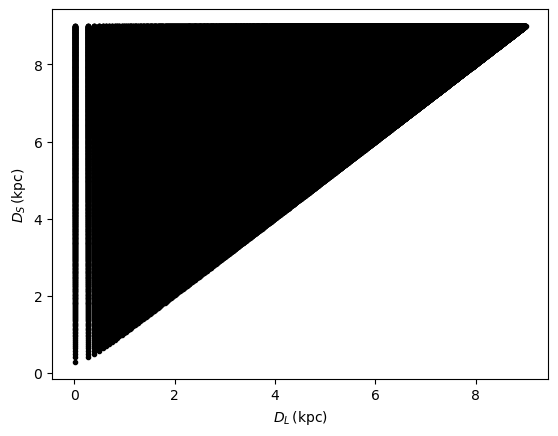

In [110]:
n=1000
Ds = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(Ds, Ds)).reshape(2,-1).T
pirel_mas = pi_rel(params[:,0],params[:,1])
params = params[pirel_mas>0]  # DL is closer than DS
print(params)

plt.figure()
plt.plot(params[:,0],params[:,1],'k.')
plt.xlabel(r'$D_L\, (\rm{kpc})$')
plt.ylabel(r'$D_S\, (\rm{kpc})$')
plt.show()

(array([    78,   1147,   4880,  13398,  28083,  50760,  84364, 128945,
       186846,    999], dtype=int64), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([12909, 35816, 56059, 73515, 82806, 84105, 76475, 55870, 21945,
           0], dtype=int64), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))


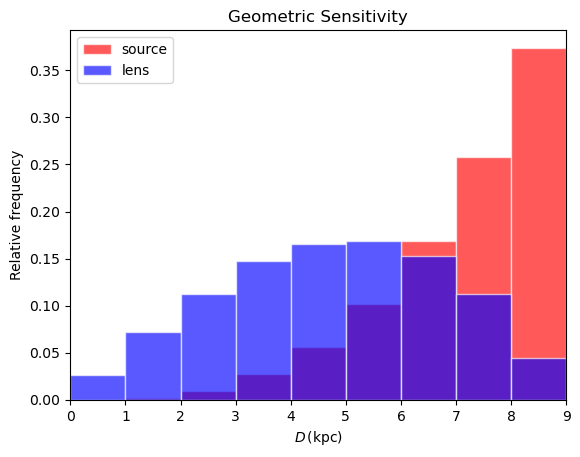

In [116]:
source_hist = np.histogram(params[:,1], bins=10, range=(0,10))
lens_hist = np.histogram(params[:,0], bins=10, range=(0,10))
print(source_hist)
print(lens_hist)

plt.hist(params[:,1], weights=np.ones(params.shape[0])/params.shape[0], bins=10, color='red', alpha=0.65, label='source', range=(0,10), ec="white")
plt.hist(params[:,0], weights=np.ones(params.shape[0])/params.shape[0], bins=10, color='blue', alpha=0.65, label='lens', range=(0,10), ec="white")
plt.legend()
plt.xlim(0,9)
plt.xlabel(r'$D\, (\rm{kpc})$')
plt.ylabel('Relative frequency')

plt.savefig('geometric_sensitiviy_of_d.png', bbox_inches='tight')
plt.title(r'Geometric Sensitivity')
plt.show()

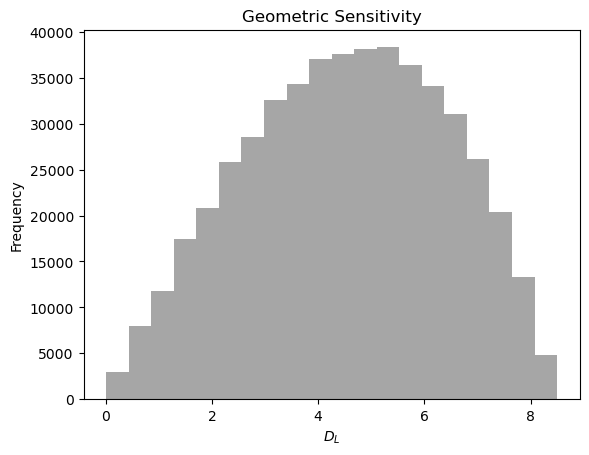

In [ ]:
plt.hist(params[:,0], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.savefig('geometric_lens_sensitivity.png')
plt.title(r'Geometric Sensitivity')
plt.show()

[[1.00000000e-02 6.38071057e-01 9.84327764e+01 2.83131865e+02
  1.03413914e+04 1.79660324e+02]
 [2.01544561e-01 6.38071057e-01 3.39445832e+00 5.25780074e+01
  1.92041172e+03 3.25596815e+01]
 [2.84851576e-01 6.38071057e-01 1.94337663e+00 3.97829854e+01
  1.45307354e+03 2.43991420e+01]
 [3.48798839e-01 6.38071057e-01 1.29975845e+00 3.25349547e+01
  1.18833922e+03 1.97776725e+01]
 [4.02716824e-01 6.38071057e-01 9.15910830e-01 2.73114954e+01
  9.97552369e+02 1.64481861e+01]]


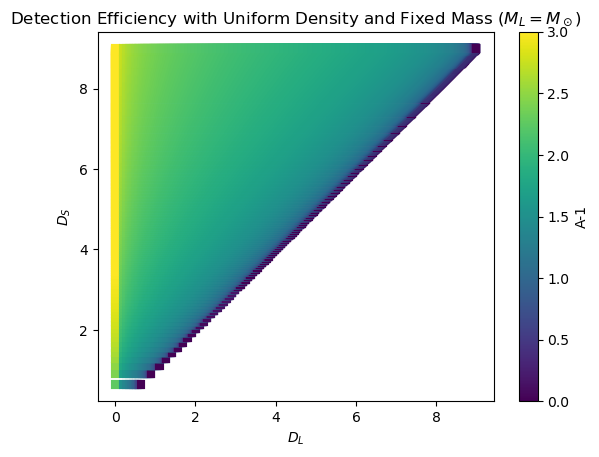

In [117]:
n = 200
M = 100.0
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]
thetaEs = thetaE(M,pirels)
tEs = tE(thetaEs,10.)
u0s = 1./(params[:,1]*thetaEs)
Amaxs = Amax(u0s,0.,tEs)-1.  # so that no magnification has 0 weight for detection

N_samples, dims = params.shape
components = np.zeros((N_samples,dims+4))
components[:,:dims] = params
components[:,dims] = pirels
components[:,dims+1] = thetaEs
components[:,dims+2] = tEs
components[:,dims+3] = u0s
components[:,-1] = Amaxs
print(components[:5,:])

plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.title(r'Detection Efficiency with Uniform Density and Fixed Mass ($M_L=M_\odot$)')
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label='A-1')
plt.clim((0,3.0))
plt.show()

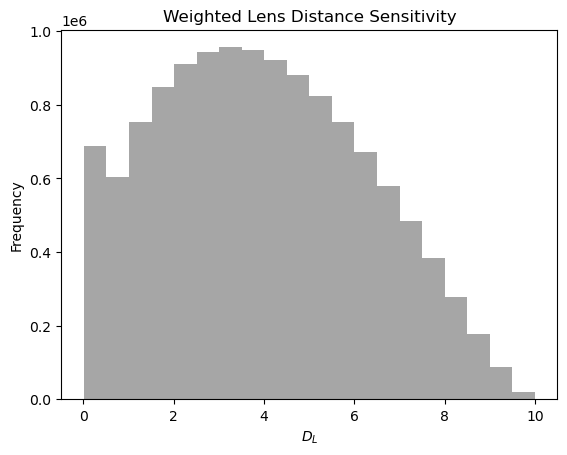

In [79]:
plt.hist(components[:,0], weights=components[:,-1], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.savefig('lens_magnification_sensitivity_100solar.png')
plt.title(r'Weighted Lens Distance Sensitivity')
plt.show()

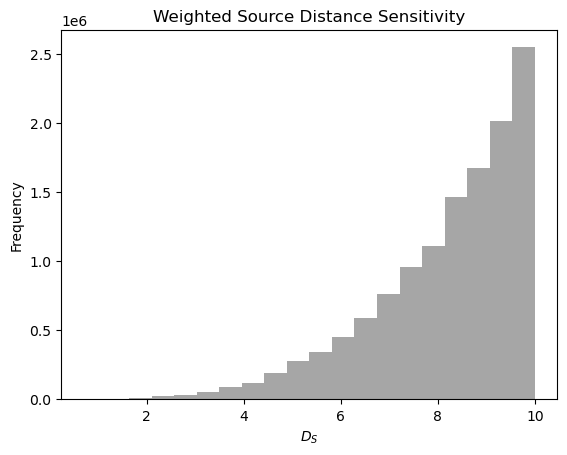

In [80]:
plt.hist(components[:,1], weights=components[:,-1], bins=20, color='grey', alpha=0.7)
plt.xlabel(r'$D_S$')
plt.ylabel('Frequency')
plt.savefig('source_distance_sensitivity.png')
plt.title(r'Weighted Source Distance Sensitivity')
plt.show()

[0.90906729 0.90672902 0.88854248 0.77942323 0.71447129 0.64951936
 0.58456742 0.51961548 0.12990387]


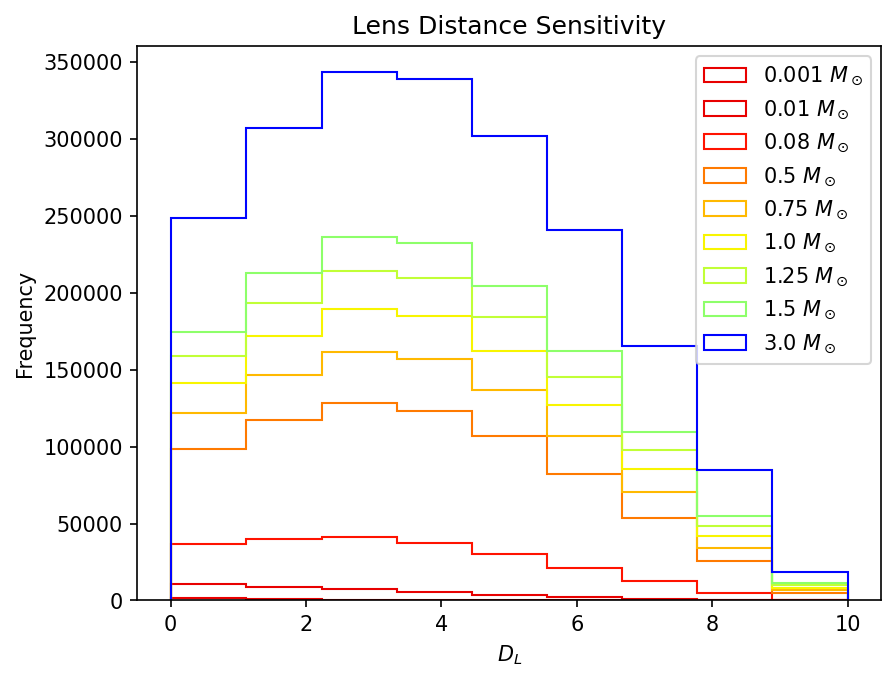

In [81]:
from matplotlib import cm

n = 200
M = np.array([0.001,0.01, 0.08, 0.5, 0.75, 1.0, 1.25, 1.5, 3.0, 100.0])
labels = ['0.001','0.01', '0.08', '0.5', '0.75', '1.0', '1.25', '1.5', '3.0', '100.0']
colour_ref = (np.log10(M)+3)/(np.log10(M[-1])+3)
colour_ref = M[:-1]/3.5
colour_ref = (1 - colour_ref)/((1 - colour_ref)[0]+0.1)
print(colour_ref)
sets = []

# stuff that's the same
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]

plt.figure(dpi=150)

# stuff that changes with m
for i, m in enumerate(M):
    thetaEs = thetaE(m,pirels)
    tEs = tE(thetaEs,10.)
    u0s = 1./(thetaEs*params[:,1])
    Amaxs = Amax(u0s,0.,tEs) - 1.

    N_samples, dims = params.shape
    components = np.zeros((N_samples,dims+4))
    components[:,:dims] = params
    components[:,dims] = pirels
    components[:,dims+1] = thetaEs
    components[:,dims+2] = tEs
    components[:,dims+3] = u0s
    components[:,-1] = Amaxs
    sets.append(components)
    if i != len(M)-1:
        plt.hist(components[:,0], weights=components[:,-1], bins=9, color=cm.jet(colour_ref[i]),  histtype='step', label=r'%s $M_\odot$' %labels[i])

plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('lens_magnification_sensitivity_by_mass.png')
#plt.yscale('log')
#plt.hist(components[:,0], weights=components[:,-1], bins=9, color=cm.jet(colour_ref[i]),  histtype='step', label=r'%s $M_\odot$' %labels[i])
#plt.legend()
#plt.savefig('lens_magnification_log_sensitivity_by_mass.png')
plt.title(r'Lens Distance Sensitivity')
plt.show()


## Detection Efficiency Based on a A>1.3 Threshold

Michael has suggested that a commonly used magnification threshold for detectability is $A=1.3$. I'm going to write a function that determines if an event has been detected based on whether or not its magnification exceedes this threshold.


In [118]:
def detection(u0, A_threshold=1.3):
    ''' Determines if an event will be ``detected'' based on a magnification threshold:
    A > 1.3 (by default).'''

    A_max = Amax(u0,0,1)  # (u0, t0, tE) but t0 and tE are nonsense parameters
    P = np.ones_like(A_max)  # 100% probability of detection (if A_max > A_threshold)
    P[A_max < A_threshold] = 0.0  # 0% probability of detection if A_max < A_threshold

    return P
    

In [120]:
n = 200
#D1 = as above
#Dn = as above
M = 1.0  # just picking a mass to reduce the diminsionality of the problem
DLs = np.sqrt(np.linspace(D1, Dn**2, n*10))  # Lens distance. n*10 because I want to more 
                                          # finely sample the DL distribution
DSs = np.sqrt(np.linspace(D1, Dn**2, n))  # Source distance
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T  # Lens-source combinations
pirels = pi_rel(params[:,0],params[:,1])  # and matching pi_rel.
params = params[pirels>0.001]  # Removing instances of DS in front of DL or unreasonably 
pirels = pirels[pirels>0.001]  # small DLS.
thetaEs = thetaE(M,pirels)  # Matching thetaE given a fixed lens mass.

b = np.sqrt(np.linspace(1,500**2,10000))  # Projected lens-source seperation at t0.
detected = np.zeros_like(thetaEs)  # 
for bb in b:  # Calculating u0 for each DL, DS, b combination.
    u0s = bb/(params[:,1]*thetaEs)  # b/DS = u0 [as], u0 [thetaE] = u0[as]/thetaE[as] 
    detected = detected + detection(u0s)  # detection(u0s) = 1.0 or 0.0, depending on  
                                          # whether Amax meets the A threshold.
detected = detected/np.sum(detected)  # Normalising the detection probability
print(detected)

N_samples, dims = params.shape
components = np.zeros((N_samples,dims+2))
components[:,:dims] = params
components[:,dims] = pirels
components[:,dims+1] = thetaEs
components[:,-1] = detected
print(components[:5,:])

plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.title('Detection Efficiency \n'+r'with Uniform Density and Fixed Mass ($M_L=%3.1f\,M_\odot$)'%M)
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label=r'$\log_{10}P$')
#plt.clim((0,100))
plt.show()

KeyboardInterrupt: 

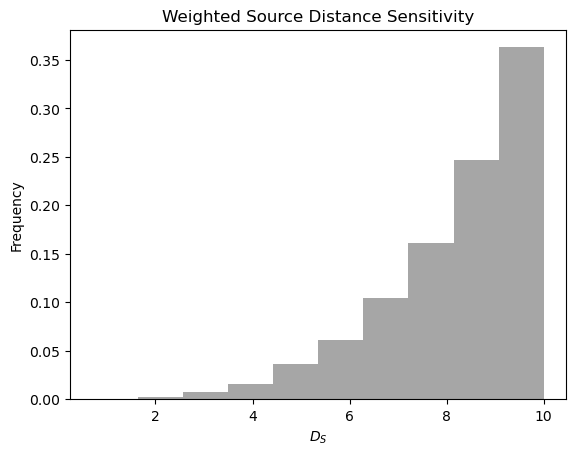

In [85]:
plt.hist(components[:,1], weights=components[:,-1], bins=10, color='grey', alpha=0.7)
plt.xlabel(r'$D_S$')
plt.ylabel('Frequency')
plt.savefig('source_distance_sensitivity.png')
plt.title(r'Weighted Source Distance Sensitivity')
plt.show()

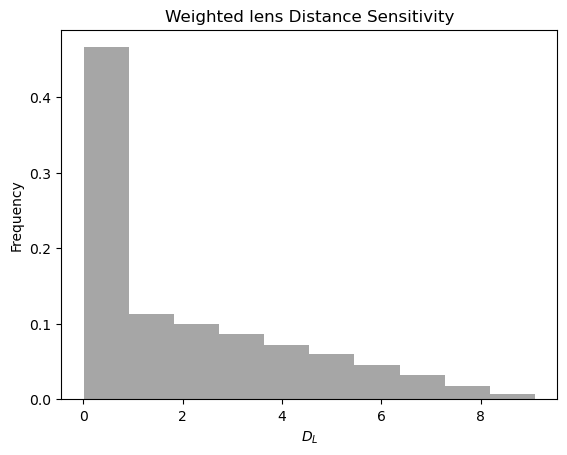

In [86]:
plt.hist(components[:,0], weights=components[:,-1], bins=10, color='grey', alpha=0.7)
plt.xlabel(r'$D_L$')
plt.ylabel('Frequency')
plt.savefig('lens_distance_sensitivity.png')
plt.title(r'Weighted lens Distance Sensitivity')
plt.show()

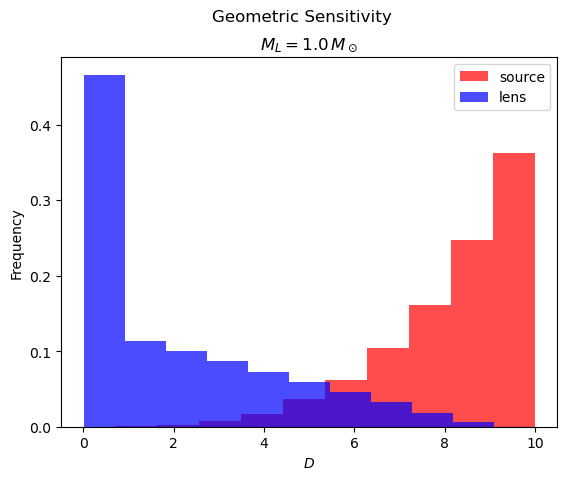

In [87]:
plt.hist(components[:,1], weights=components[:,-1], bins=10, color='red', alpha=0.7, label='source')
plt.hist(components[:,0], weights=components[:,-1], bins=10, color='blue', alpha=0.7, label='lens')
plt.legend()
plt.suptitle(r'Geometric Sensitivity')
plt.title(r'$M_L=%3.1f\,M_\odot$' %M)
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()

In [88]:
# Sampling density scale
n = 200  # Parameter array shapes are based on this number, but their bounds are not.

# Parameter distributions
# Chosen in order to represent uniformly distributed objects, with uniformly distributed 
# mass.
Ms = np.linspace(0.01,10,20) 
DLs = np.sqrt(np.linspace(D1, Dn, n*10))  # Lens distance. n*10 because I want to more 
                                          # finely sample the DL distribution.
DSs = np.sqrt(np.linspace(D1, Dn, n))  # Source distance
bs = np.sqrt(np.linspace(0,500**2,n*50))  # Projected lens-source seperation at t0.
bs = bs[1:]  # otherwise the 0s are hecking extreme

# (DL, DS)-grid (for speed)
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T  # Lens-source combinations.

# Dependent parameters
pirels = pi_rel(params[:,0],params[:,1])

# Removing instances of DS in front of DL or unreasonably small pirel (DS and DL very
# close together).
params = params[pirels>0.01]  
pirels = pirels[pirels>0.01]

# Marginalising over M and u0
# RAM can't cope with these all going in a giant meshgrid, so I'm doing it the slow way.
detected = np.zeros_like(pirels)  # The detection Probability will be added to this.
for ML in Ms:
    thetaEs = thetaE(ML,pirels)  # thetaE, given a lens mass, for each grid parameter set.
    for b in bs:  
        u0s = b/(params[:,1]*thetaEs)  # Calculating u0 for each DL, DS, b combination.
                                        # b/DS = u0 [as], u0 [thetaE] = u0[as]/thetaE[as] 
        detected = detected + detection(u0s)  # detection(u0s) = 1.0 or 0.0, depending on  
                                              # whether Amax meets the A threshold.
detected = detected/np.sum(detected)  # Normalising the detection probability

# Packing everything away in one array
N_samples, dims = params.shape
components = np.zeros((N_samples,dims+1))
components[:,:dims] = params
components[:,dims] = pirels
components[:,-1] = detected
print(components[:5,:])  # a wee check

[[1.00000000e-02 7.08951381e-01 2.29944936e-05]
 [2.23886048e-01 7.08951381e-01 5.95121807e-07]
 [3.16464729e-01 7.08951381e-01 3.03891986e-07]
 [3.87524048e-01 7.08951381e-01 1.64608159e-07]
 [4.47436979e-01 7.08951381e-01 8.86351627e-08]]


C:\Users\amber\AppData\Local\Temp\ipykernel_1672\2118829881.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)


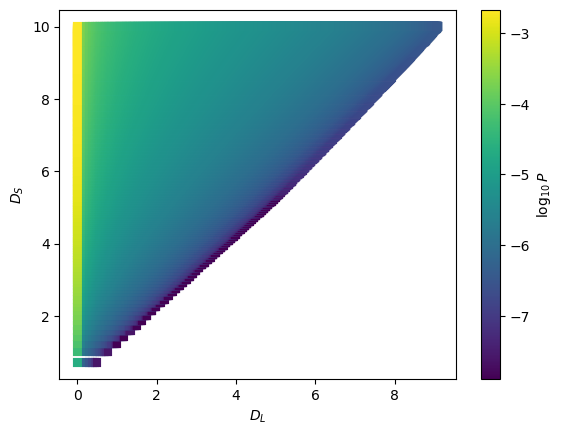

In [89]:
plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label=r'$\log_{10}P$')
#plt.clim((0,100))
plt.show()

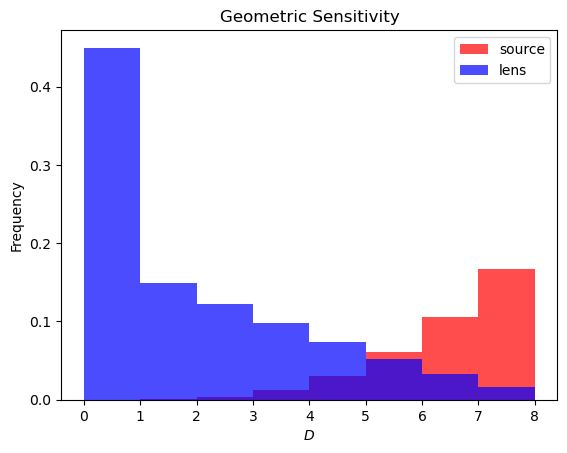

<Figure size 640x480 with 0 Axes>

In [90]:
plt.hist(components[:,1], weights=components[:,-1], bins=range(9), color='red', alpha=0.7, label='source')
plt.hist(components[:,0], weights=components[:,-1], bins=range(9), color='blue', alpha=0.7, label='lens')
plt.legend()
plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()
plt.savefig('geometric_sensitiviy_msd_agnostic.png', bbox_inches='tight')

### 0<D<10

In [ ]:
# Sampling density scale  
n = 200  # Parameter array shapes are based on this number, but their bounds are not.

# Parameter distributions
# Chosen in order to represent uniformly distributed objects, with uniformly distributed 
# mass.
Ms = np.linspace(0.01,10,n)  
DLs = np.sqrt(np.linspace(D1, 10**2, n*10))  # Lens distance. n*10 because I want to more 
                                          # finely sample the DL distribution.
DSs = np.sqrt(np.linspace(D1, 10**2, n))  # Source distance
bs = np.sqrt(np.linspace(1,500**2,n*10))  # Projected lens-source seperation at t0.

# (DL, DS)-grid (for speed)
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T  # Lens-source combinations.

# Dependent parameters
pirels = pi_rel(params[:,0],params[:,1])

# Removing instances of DS in front of DL or unreasonably small pirel (DS and DL very
# close together).
params = params[pirels>0.01]  
pirels = pirels[pirels>0.01]

# Marginalising over M and u0
# RAM can't cope with these all going in a giant meshgrid, so I'm doing it the slow way.
detected = np.zeros_like(pirels)  # The detection Probability will be added to this.
for ML in Ms:
    thetaEs = thetaE(ML,pirels)  # thetaE, given a lens mass, for each grid parameter set.
    for b in bs:  
        u0s = b/(params[:,1]*thetaEs)  # Calculating u0 for each DL, DS, b combination.
                                        # b/DS = u0 [as], u0 [thetaE] = u0[as]/thetaE[as] 
        detected = detected + detection(u0s)  # detection(u0s) = 1.0 or 0.0, depending on  
                                              # whether Amax meets the A threshold.
detected = detected/np.sum(detected)  # Normalising the detection probability

# Packing everything away in one array
N_samples, dims = params.shape
components = np.zeros((N_samples,dims+1))
components[:,:dims] = params
components[:,dims] = pirels
components[:,-1] = detected
print(components[:5,:])  # a wee check

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label=r'$\log_{10}P$')
#plt.clim((0,100))
plt.show()

In [ ]:
plt.hist(components[:,1], weights=components[:,-1], bins=range(11), color='red', alpha=0.7, label='source')
plt.hist(components[:,0], weights=components[:,-1], bins=range(11), color='blue', alpha=0.7, label='lens')
plt.legend()
plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()
plt.savefig('geometric_sensitiviy_msd_agnostic.png', bbox_inches='tight')

## Detection Efficiency Based on Period of Detectability

Michael has suggested that a commonly used magnification threshold for detectability is $A=1.3$. I'm going to write a function that determines the probability of detection based on how long the event is above the detectability threshold. This will require some extra prior distributions for velocity and I need to think about how to keep those uniform but representative of the geometry of an observation. 

### Getting t from A
$$t = t_E \sqrt{u(t)^2 - u_{0}^{2}}+t_0,$$
$$t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}.$$

$$A(u)={\frac {u^{2}+2}{u{\sqrt {u^{2}+4}}}}.$$
$$u = 2\sqrt{-1\pm\sqrt{1+(A^2-1)^{-1}}}$$

In [ ]:
def detectability(u0, tE, t0=0):
    ''' probabilities based on how long the event is detectable for'''

    # calculate t from A
    t_det = detectable_duration(u0, tE, t0=0)

    cadence = (365.25/2., 1./2., 1./50.) # off-season, day-time, shortest event

    if len(t_det) == 1:
        # Case 1
        if t_det > cadence[0]:  # 185.125 days
            P = 1.  # event will definitely be observed
        # Case 2
        elif t_det > cadence[1]:  # 0.5 days = 12 hr
            P = (cadence[0] + t_det - cadence[1]) / 365.25  # probability the event will happen 
                                                            # during the observing season
        # Case 3
        elif t_det > cadence[2]:  # 0.02 days ~ 30 min
            P1 = (cadence[0] + t_det - cadence[1]) / 365.25
            P2 = (cadence[1] + t_det + cadence[2])
            P = P1 * P2
        # Case 4
        else:
            P = 0.  # event isn't long enough to be detectable

    else:
        P = np.zeros_like(t_det)
        case1 = np.where(t_det>cadence[0])
        case2 = np.where((t_det<cadence[0]) & (t_det>cadence[1]))
        case3 = np.where((t_det<cadence[1]) & (t_det>cadence[2]))
        case4 = np.where(t_det<cadence[2])
        
        P[case1] = 1.0
        P[case2] = (cadence[0] + t_det[case2] - cadence[1]) / 365.25
        P[case3] = (cadence[0] + t_det[case3] - cadence[1]) / 365.25 * (cadence[1] + t_det[case3] + cadence[2])
        P[case4] = 0.0

    return P

def detectable_duration(u0, tE, t0=0):
    ''' $t_{det}$, given a detectability threshold of $A=1.3$.'''

    # Will the event be magnified enough for detection
    A_threshold = 1.3
    t_det = 2.*t_from_A(A_threshold,u0,tE)

    return t_det

def t_from_A(Ai,u0,tE):
    ''' find the positive time (since $t_0$) where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    u = u_from_A(Ai)

    if type(u0) == type(1.0):
        if u**2 < u0**2:
            uterm = 0.
        else:
            uterm = np.sqrt(u**2 - u0**2)
    else:
        uterm = np.zeros_like(u0)
        possible = np.where( u**2 >= u0**2 )
        uterm[possible] = np.sqrt(u**2 - u0**2)
        
    t = tE * uterm

    return t

def quadratic_formula(a, b, c, pm=False):
    ''' finding x, from a 2 degree polynomial, using the quadratic formula.
    
    INPUT
    ------
    a - float or numpy array
    b - float or numpy array
    c - float or numpy array

    OPTIONAL INPUTS
    ----------------
    pm - boolean
         return both positive and negative sqrt solution

    OUTPUTS
    --------
    x - float or numpy array, like a, b, and c
    or 
    x1, x2 - (if pm is True) floats or numpy arrays, like a, b, and c

    NOTES
    ------
    $ax^2 + bx + c = 0$
    $x = \frac{ -b \pm sqrt{b^2 - 4ac} {2a}$
    '''
    
    x1 = (-b + np.sqrt(b**2-4.0*a*c)) / 2*a
    x2 = (-b - np.sqrt(b**2-4.0*a*c)) / 2*a

    if pm:
        return x1, x2
    else:
        return x1

def u_from_A(Ai):
    ''' find u where the $A = A_i$
    
    NOTES
    ------
    $x = u^2$
    $x^2 + 4x -4/(A^2-1) = 0$
    $a = 1$, $b = 4$, $c = \frac{-4}{A^2-1}$
    '''

    a = (1.0)
    b = (4.0)
    c = -4.0/(Ai**2-1.0)
    
    x1 = quadratic_formula(a, b, c)
    #u1 = np.sqrt(1./Ai**2 - 4. + np.sqrt(16. + 1./(Ai**4.)))
    u1 = np.sqrt(x1)

    return u1
    

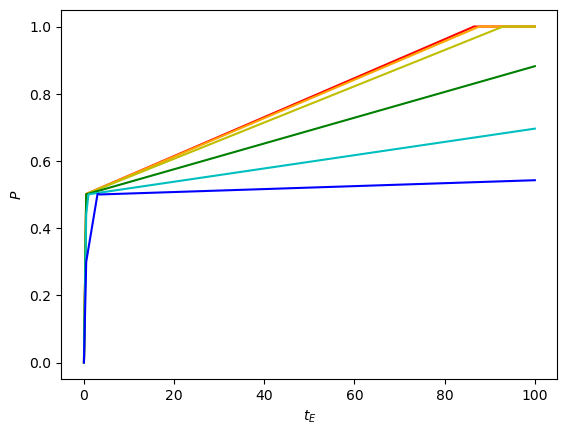

In [ ]:
import matplotlib.pyplot as plt

tE = np.linspace(0.001, 100, 200)  # days
u0 = 0.2  # theta_E
A_threshold = 1.3  # X
#print(detectability(u0, tE, pi_rel))

plt.figure()
plt.plot(tE, detectability(u0/2., tE), 'r-')
plt.plot(tE, detectability(u0, tE, pi_rel), color='orange')
plt.plot(tE, detectability(u0*2., tE), 'y-')
plt.plot(tE, detectability(u0*4., tE), 'g-')
plt.plot(tE, detectability(u0*5., tE), 'c-')
plt.plot(tE, detectability(u0*5.3, tE), 'b-')
plt.xlabel(r'$t_E$')
plt.ylabel(r'$P$')
plt.show()

In [ ]:
# Testing A to u
import numpy as np

def quadratic_formula(a, b, c, pm=False):
    ''' '''
    x1 = (-b + np.sqrt(b**2-4.0*a*c)) / 2*a
    x2 = (-b - np.sqrt(b**2-4.0*a*c)) / 2*a

    if pm:
        return x1, x2
    else:
        return x1

def u_from_A(Ai):
    ''' find u where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    a = (1.0)
    b = (4.0)
    c = -4.0/(Ai**2-1.0)
    
    x1 = quadratic_formula(a, b, c)
    #u1 = np.sqrt(1./Ai**2 - 4. + np.sqrt(16. + 1./(Ai**4.)))
    u1 = np.sqrt(x1)

    return u1

def t_from_A(Ai,u0,tE,pi_rel):
    ''' find the positive time (since $t_0$) where the $A = A_i$
    
    NOTES
    ------
    $t' = t_E \sqrt{u(t)^2 - u_{0}^{2}}$
    '''

    u = u_from_A(Ai)
    t = tE * np.sqrt(u**2 - u0**2)

    return t

tE = 5.  # days
pi_rel = (1/4 - 1/8)  # mas
u0 = 0.2  # theta_E
A_threshold = 1.9  # X
print(A_threshold)

# calculate u
us = u_from_A(A_threshold)
print(us)

# calculate t
t = t_from_A(A_threshold,u0,tE,pi_rel)
print(t)

# re-calculate A
As = A(us)
print(As)
us = u(t,u0,0.,tE)
print(us)
A = A(us)
print(As)


1.9
0.5934146528715456
2.793478791053625
1.8999999999999997
0.5934146528715456
1.8999999999999997


### Onwards to the Histogram

The new detectability fuction is:
``` python
detectability(u0, tE, t0=0)
```

The old script was:
``` python
n = 200
M = 100.0
DLs = np.sqrt(np.linspace(D1, Dn, n*10))
DSs = np.sqrt(np.linspace(D1, Dn, n))
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
pirels = pi_rel(params[:,0],params[:,1])
params = params[pirels>0]
pirels = pirels[pirels>0]
thetaEs = thetaE(M,pirels)
tEs = tE(thetaEs,10.)
u0s = 1./(params[:,1]*thetaEs)
Amaxs = Amax(u0s,0.,tEs)-1.  # so that no magnification has 0 weight for detection

N_samples, dims = params.shape
components = np.zeros((N_samples,dims+4))
components[:,:dims] = params
components[:,dims] = pirels
components[:,dims+1] = thetaEs
components[:,dims+2] = tEs
components[:,dims+3] = u0s
components[:,-1] = Amaxs
```

$$\mu = \frac{v_{tan}}{\kappa d},$$
where $\kappa=4.74$, with $v$ in km/s, $d$ (the distance to the object) is in parsecs, and $\mu$ is in as/yr.
 

In [ ]:
import numpy as np

# set-up values
n = 40  # nummber of lens instances
M = 1.0  # solar masses
D1, Dn  = 0.001**2, 8.5**2
print(D1, Dn)

# uniform distributions
DLs = np.sqrt(np.linspace(D1, Dn, n))
DSs = np.sqrt(np.linspace(D1, Dn, n))
v = np.linspace(0, 300, n)
angle = np.linspace(0, 2*np.pi, n)

# remove derpy distances
Dparams = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T
not_derpy = np.where(Dparams[:,0] < Dparams[:,1])
Dparams = Dparams[not_derpy]


1e-06 72.25


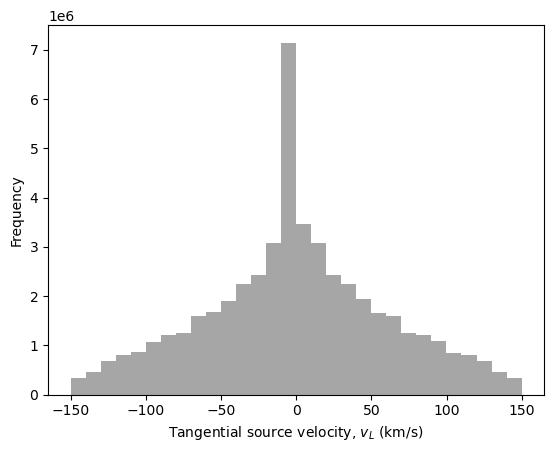

In [ ]:
def v_to_pm(d,v):
    ''' get proper motion from velocity, given a distance to the object
    
    INPUTS
    -------
    d - float or numpy array 
        units: killoparsec (kpc)
    v - float or numpy array
        units: kilometers per second (km/s)

    OUTPUTS
    --------
    pm - float or numpy array (like v or d)
         units: milliarcseconds per yr (mas/yr)

    NOTES
    ------
    $$\mu = \frac{v_{tan}}{\kappa d},$$
    where $\kappa=4.74$.
    '''

    kappa = 4.74
    pm = v/(kappa*d)

    return pm

# uniform distributions
v = np.linspace(0, 150, n)
angle = np.linspace(0, 2*np.pi, n)

# mesh grid
Lparams = np.vstack(np.meshgrid(Dparams[:,0], v, angle, angle)).reshape(4,-1).T
Sparams = np.vstack(np.meshgrid(Dparams[:,1], v, angle, angle)).reshape(4,-1).T

# tangential velocity
vL = Lparams[:,1] * np.sin(Lparams[:,3])
vS = Sparams[:,1] * np.sin(Sparams[:,3])

# check with a histogram
plt.hist(vS, bins=30, color='grey', alpha=0.7)
plt.xlabel(r'Tangential source velocity, $v_{L}$ (km/s)')
plt.ylabel(r'Frequency')
plt.savefig('tangential_source_velocity_distribution.png')
plt.show()
# I'm fairly sure this is an arcsintype thing

# velocities projected into N and E
vLN = vL * np.cos(Lparams[:,2])
vLE = vL * np.sin(Lparams[:,2])
vSN = vS * np.cos(Sparams[:,2])
vSE = vS * np.sin(Sparams[:,2])

# convert tangential velocities to 
pmLN = v_to_pm(Lparams[:,0], vLN)
pmLE = v_to_pm(Lparams[:,0], vLE)
pmSN = v_to_pm(Sparams[:,0], vSN)
pmSE = v_to_pm(Sparams[:,0], vSE)

# 


'''
# relative proper motion
pm_relN = pmLN - pmSN
pm_relE = pmLE - pmSE
pm_rel = np.sqrt(pm_relN**2 + pm_relE**2)'''



# pm to tE



#pirels = pi_rel(params[:,0], params[:,1])
#params = params[pirels>0]
#pirels = pirels[pirels>0]
#thetaEs = thetaE(M, pirels)
#tEs = tE(thetaEs,10.)
#u0s = 1./(params[:,1]*thetaEs)

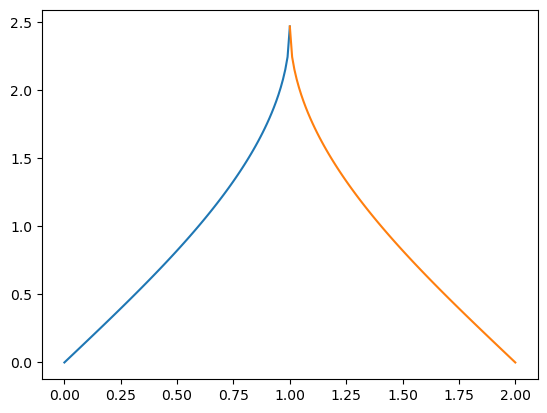

In [ ]:
a = np.linspace(0, 1., 100)
b = np.arcsin(a)*np.arccos(a)
c = np.arcsin(a)*np.arcsin(a)
plt.figure()
#plt.plot(a,b)
#plt.plot(a,c)
plt.plot(a, b+c)
plt.plot(a+1.,(b+c)[::-1])
plt.show()

In [ ]:
import numpy as np

print(np.cos(np.pi))  # South
print(np.cos(0.))  # North
print(np.sin(np.pi))  # South (E=0)
print(np.sin(0.))  # North (E=0)
print(np.sin(np.pi/2.))  # East
print(np.sin(3*np.pi/2.))  # West



-1.0
1.0
1.2246467991473532e-16
0.0
1.0
-1.0


## Flat DL, DS

I think the cononical, $D_L<D_S$ part of the above models is accounted for in the galactic modelling. What I don't think is accounted for is the implied u0s.

In [121]:
# Sampling density scale  
n = 201  # Parameter array shapes are based on this number, but their bounds are not.

# Parameter distributions
# Chosen in order to represent uniformly distributed objects, with uniformly distributed 
# mass.
Ms = np.linspace(0.01,10,n-1) 
Dn = 9.0 
DLs = np.linspace(0, Dn, n)  # Flat lens distance distribution
DLs = DLs[1:]  # remove 0
DSs = np.linspace(0, Dn, n)  # Flat source distance distribution
DSs = DLs[1:]
bs = np.sqrt(np.linspace(0.,500**2,n*10))  # Projected lens-source seperation at t0.
bs = bs[1:]

# (DL, DS)-grid (for speed)
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T  # Lens-source combinations.

# Dependent parameters
pirels = pi_rel(params[:,0],params[:,1])

# Removing instances of DS in front of DL or unreasonably small pirel (DS and DL very
# close together).
params = params[pirels>0.001]  
pirels = pirels[pirels>0.001]

# Marginalising over M and u0
# RAM can't cope with these all going in a giant meshgrid, so I'm doing it the slow way.
detected = np.zeros_like(pirels)  # The detection Probability will be added to this.
for ML in Ms:
    thetaEs = thetaE(ML,pirels)  # thetaE, given a lens mass, for each grid parameter set.
    for b in bs:  
        u0s = b/(params[:,1]*thetaEs)  # Calculating u0 for each DL, DS, b combination.
                                        # b/DS = u0 [as], u0 [thetaE] = u0[as]/thetaE[as] 
        detected = detected + detection(u0s)  # detection(u0s) = 1.0 or 0.0, depending on  
                                              # whether Amax meets the A threshold.
detected = detected/np.sum(detected)  # Normalising the detection probability

# Packing everything away in one array
N_samples, dims = params.shape
components = np.zeros((N_samples,dims+1))
components[:,:dims] = params
components[:,dims] = pirels
components[:,-1] = detected
print(components[:5,:])  # a wee check

KeyboardInterrupt: 

C:\Users\amber\AppData\Local\Temp\ipykernel_3556\2118829881.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)


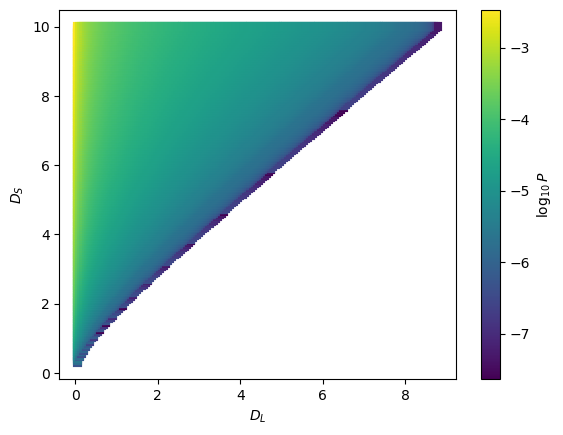

In [ ]:
plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label=r'$\log_{10}P$')
#plt.clim((0,100))
plt.show()

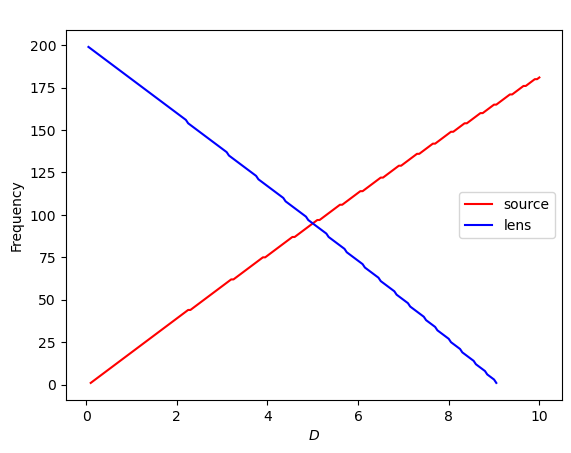

In [ ]:
#plt.hist(components[:,1], bins=n-1, color='red', alpha=0.7, label='source')
#plt.hist(components[:,0],  bins=n-1, color='blue', alpha=0.7, label='lens')

# Count occurrences of each unique value
unique_values_DS, counts_DS = np.unique(components[:,1], return_counts=True)
plt.plot(unique_values_DS, counts_DS, color='red', label='source')
unique_values_DL, counts_DL = np.unique(components[:,0], return_counts=True)
plt.plot(unique_values_DL, counts_DL, color='blue', label='lens')

plt.legend()
plt.title(r' ')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()

weights_DL = np.ones_like(components[:,0])
for i, d in enumerate(components[:,0]):
    weights_DL[i] = counts_DL[unique_values_DL==d][0]

weights_DS = np.ones_like(components[:,1])
for i, d in enumerate(components[:,1]):
    weights_DS[i] = counts_DS[unique_values_DS==d][0]





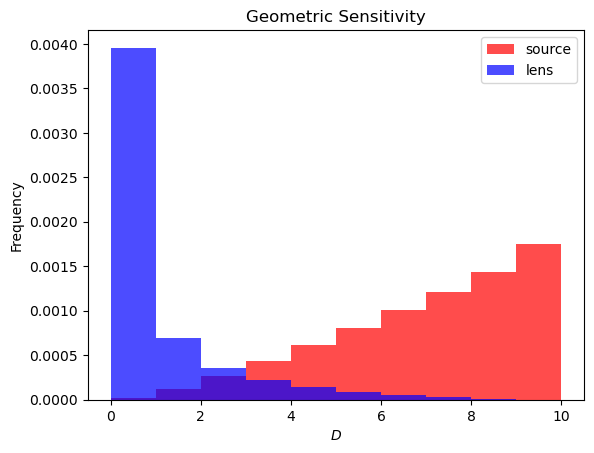

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(components[:,1], weights=components[:,-1]/weights_DS, bins=range(11), color='red', alpha=0.7, label='source')
plt.hist(components[:,0], weights=components[:,-1]/weights_DL, bins=range(11), color='blue', alpha=0.7, label='lens')
plt.legend()
plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()
plt.savefig('geometric_sensitiviy_msd_agnostic.png', bbox_inches='tight')

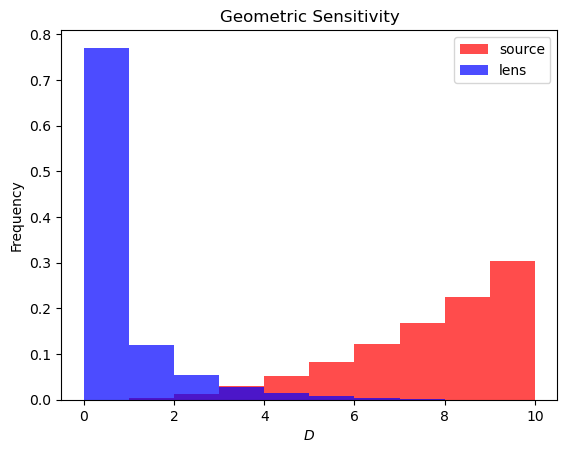

<Figure size 640x480 with 0 Axes>

In [ ]:
# Normalise Bins

plt.hist(components[:,1], weights=components[:,-1], bins=range(11), color='red', alpha=0.7, label='source')
plt.hist(components[:,0], weights=components[:,-1], bins=range(11), color='blue', alpha=0.7, label='lens')
plt.legend()
plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()
plt.savefig('geometric_sensitiviy_msd_agnostic.png', bbox_inches='tight')

In [125]:
# Sampling density scale  
n = 201  # Parameter array shapes are based on this number, but their bounds are not.

# Parameter distributions
# Chosen in order to represent uniformly distributed objects, with uniformly distributed 
# mass.
Ms = np.linspace(0.01,10,20)
Dn = 9.0
DLs = np.sqrt(np.linspace(0, Dn**2, n))  # Lens distance. 
DSs = np.sqrt(np.linspace(0, Dn**2, n))  # Source distance
DLs = DLs[1:]  # remove 0
DSs = DLs[1:]
bs = np.sqrt(np.linspace(0.,500**2,n*10))  # Projected lens-source seperation at t0.
bs = bs[1:]

# (DL, DS)-grid (for speed)
params = np.vstack(np.meshgrid(DLs, DSs)).reshape(2,-1).T  # Lens-source combinations.

# Dependent parameters
pirels = pi_rel(params[:,0],params[:,1])

# Removing instances of DS in front of DL or unreasonably small pirel (DS and DL very
# close together).
params = params[pirels>0.01]  
pirels = pirels[pirels>0.01]

# Marginalising over M and u0
# RAM can't cope with these all going in a giant meshgrid, so I'm doing it the slow way.
detected = np.zeros_like(pirels)  # The detection Probability will be added to this.
for ML in Ms:
    thetaEs = thetaE(ML,pirels)  # thetaE, given a lens mass, for each grid parameter set.
    for b in bs:  
        u0s = b/(params[:,1]*thetaEs)  # Calculating u0 for each DL, DS, b combination.
                                        # b/DS = u0 [as], u0 [thetaE] = u0[as]/thetaE[as] 
        detected = detected + detection(u0s)  # detection(u0s) = 1.0 or 0.0, depending on  
                                              # whether Amax meets the A threshold.
detected = detected/np.sum(detected)  # Normalising the detection probability

# Packing everything away in one array
N_samples, dims = params.shape
components = np.zeros((N_samples,dims+1))
components[:,:dims] = params
components[:,dims] = pirels
components[:,-1] = detected
print(components[:5,:])  # a wee check

[[0.6363961  0.9        0.        ]
 [0.6363961  1.10227038 0.        ]
 [0.9        1.10227038 0.        ]
 [0.6363961  1.27279221 0.        ]
 [0.9        1.27279221 0.        ]]


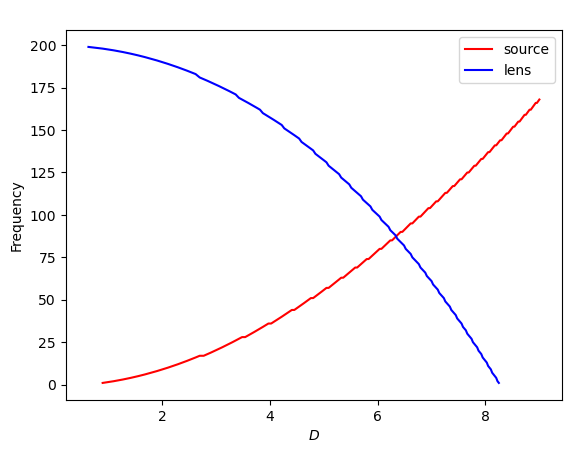

In [126]:
#plt.hist(components[:,1], bins=n-1, color='red', alpha=0.7, label='source')
#plt.hist(components[:,0],  bins=n-1, color='blue', alpha=0.7, label='lens')

# Count occurrences of each unique value
unique_values_DS, counts_DS = np.unique(components[:,1], return_counts=True)
plt.plot(unique_values_DS, counts_DS, color='red', label='source')
unique_values_DL, counts_DL = np.unique(components[:,0], return_counts=True)
plt.plot(unique_values_DL, counts_DL, color='blue', label='lens')

plt.legend()
plt.title(r' ')
plt.xlabel(r'$D$')
plt.ylabel('Frequency')
plt.show()

weights_DL = np.ones_like(components[:,0])
for i, d in enumerate(components[:,0]):
    weights_DL[i] = counts_DL[unique_values_DL==d][0]

weights_DS = np.ones_like(components[:,1])
for i, d in enumerate(components[:,1]):
    weights_DS[i] = counts_DS[unique_values_DS==d][0]





C:\Users\amber\AppData\Local\Temp\ipykernel_1672\2118829881.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)


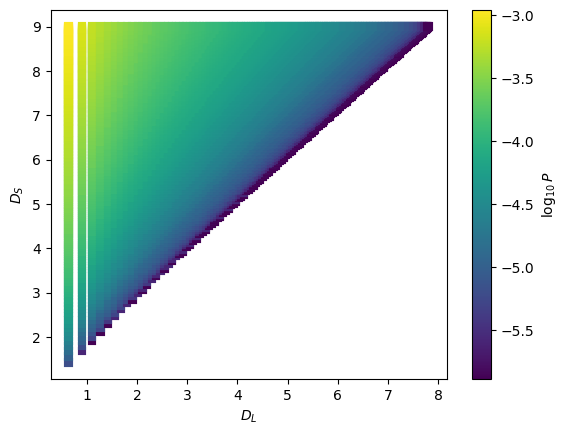

In [127]:
plt.figure()
plt.scatter(components[:,0],components[:,1],c=np.log10(components[:,-1]),marker='s', linewidths=0.1)
plt.xlabel(r'$D_L$')
plt.ylabel(r'$D_S$')
plt.colorbar(label=r'$\log_{10}P$')
#plt.clim((0,100))
plt.show()

n(0<D<1):  1 397
0.0
0.00045039823475096077
1.0 0.17880809919613141 0.022818714794804
n(1<D<2):  35 1358
2.735549505330583e-06
0.00019640023381484263
1.0 0.2667115175205563 0.0780549488446948
n(2<D<3):  191 2387
9.88521606585952e-06
9.49623415083117e-05
1.0 0.22667510918034003 0.13719967812392228
n(3<D<4):  484 2842
1.8626605268114604e-05
5.2739058689797005e-05
1.0 0.14988440479640308 0.16335210943786643
n(4<D<5):  1005 3192
2.828059166214001e-05
3.090211099091864e-05
1.0 0.09863953828301229 0.18346936429474653
n(5<D<6):  1804 3144
3.8628870464852213e-05
1.7337096044322235e-05
1.0 0.05450782996334911 0.18071042648580296
n(6<D<7):  2932 2590
4.949136509890755e-05
8.318042063416022e-06
1.0 0.021543728944247498 0.14886768594091274
n(7<D<8):  4566 1420
6.109905138247036e-05
2.274487405605851e-06
1.0 0.0032297721159603083 0.08161857684791356
n(8<D<9):  6212 68
7.301509848695663e-05
0.0
1.0 0.0 0.0039084952293367056
1.0
1.0


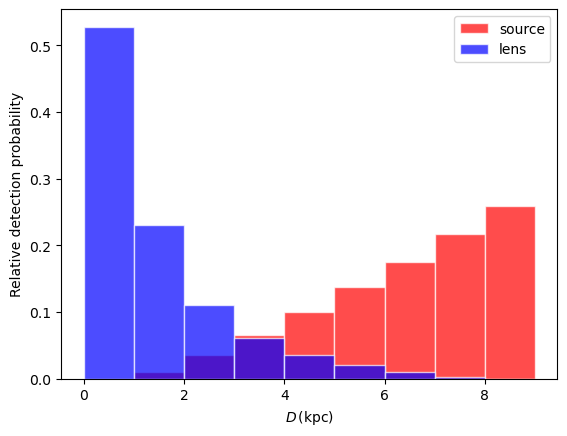

<Figure size 640x480 with 0 Axes>

In [134]:
weights_DS = weights_DS**0  # =1
weights_DL = weights_DL**0 
DS = components[:,1].copy()
DL = components[:,0].copy()
detection_weights = components[:,-1].copy()

hist = np.zeros((9,2))
for i in range(9):
    j = i+1
    
    count_DS = (DS[(DS >= i) & (DS < j)]).shape[0]
    weights_DS[(DS >= i) & (DS < j)] = count_DS
    count_DL = (DL[(DL >= i) & (DL < j)]).shape[0]
    weights_DL[(DL >= i) & (DL < j)] = count_DL
    print('n(%i<D<%i): ' %(i,j), count_DS, count_DL)
    print(np.sum(detection_weights[(DS >= i) & (DS < j)])/count_DS)
    print(np.sum(detection_weights[(DL >= i) & (DL < j)])/count_DL)
    print(np.sum(detection_weights), np.sum(detection_weights[(DL >= i) & (DL < j)]), count_DL/DL.shape[0])
    hist[i,0] = DL.shape[0]*np.sum(detection_weights[(DL >= i) & (DL < j)])/count_DL
    hist[i,1] = DS.shape[0]*np.sum(detection_weights[(DS >= i) & (DS < j)])/count_DS

hist[np.isnan(hist)] = 0.0  # remove nans
hist[:,1] = hist[:,1]/np.sum(hist[:,1])  # normalise
hist[:,0] = hist[:,0]/np.sum(hist[:,0])  # normalise
print(np.sum(hist[:,1]))
print(np.sum(hist[:,0]))

#plt.hist(DS, weights=detection_weights/weights_DS, bins=range(11), color='red', alpha=0.7, label='source')
#plt.hist(DL, weights=detection_weights/weights_DL, bins=range(11), color='blue', alpha=0.7, label='lens')
plt.bar(np.linspace(0.5,8.5,9), hist[:,1], color='red', label='source', alpha=0.7, width=1, ec='white')
plt.bar(np.linspace(0.5,8.5,9), hist[:,0], color='blue', label='lens', alpha=0.7, width=1, ec='white')
        # align='edge', 'center'
plt.legend()
#plt.title(r'Geometric Sensitivity')
plt.xlabel(r'$D\, (\rm{kpc})$')
plt.ylabel('Relative detection probability')
plt.show()
plt.savefig('geometric_sensitiviy_ms_agnostic_d_noralised.png', bbox_inches='tight')

## Cusp and Fold Diagram

In [135]:
s = 1.0
q = 0.05
rho = 0.1

solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

<class 'VBBinaryLensing.VBBinaryLensing._sols'>


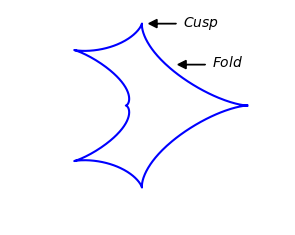

In [136]:
hide = True  # hide axis?

plt.figure(figsize=(3,3))
plt.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'b-')  # caustic

#hide axis
if hide:
    axc = 'white'
else:
    axc = 'red'
ax = plt.gca()
ax.spines['bottom'].set_color(axc)
ax.spines['top'].set_color(axc) 
ax.spines['right'].set_color(axc)
ax.spines['left'].set_color(axc)
ax.tick_params(axis='x', colors=axc)
ax.tick_params(axis='y', colors=axc)

#image size
ax.set_ylim(-0.35, 0.35)
ax.set_xlim(-0.3, 0.55)
ax.set_aspect('equal')  # Equal in x and y

#labels
buff = 0.05
arrow_length = 0.1
#cusp
y = np.max(caustic_curves[:, 1])
x_index = np.argmax(caustic_curves[:, 1])
x = caustic_curves[x_index, 0]
ax.text(x+buff+arrow_length, y-0.01, r'$Cusp$')
ax.arrow(x+arrow_length+buff/2, y, -arrow_length, 0.0, head_width=0.03, head_length=0.03\
            , length_includes_head=True, width=0.001, color='k')
#fold
y = y/2
x = 0.13
ax.text(x+buff+arrow_length, y-0.01, r'$Fold$')
ax.arrow(x+arrow_length+buff/2, y, -arrow_length, 0.0, head_width=0.03, head_length=0.03\
            , length_includes_head=True, width=0.001, color='k')

#save
plt.savefig('cusp_and_fold.png', bbox_inches='tight')  # 'tight' removes outer padding

## Remake Magnification Map Figure

In [159]:
s = 1.0 # 0.75 #
q = 0.4 # 0.1 #
rho = 0.05

solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBBinaryLensing.VBBinaryLensing._sols'>


In [160]:
#plot bounds
xlims = (-2.0,2.0)
ylims = (-2.0,2.0)

x = np.linspace(xlims[0], xlims[1], 1000)
y = np.linspace(ylims[0], ylims[1], 1000)
xx, yy = np.meshgrid(x,y)

print(xx.shape) 
A = np.abs(xx*0.)
print(A[0:5,0:5])
for i in range(A.shape[1]-1):  # the shape indexes are backwards from what I expected
    for j in range(A.shape[0]-1):  # x
        A[j, i] = VBBL.BinaryMag2(s, q, xx[j,i], yy[j,i], 0.0001)

(1000, 1000)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


C:\Users\amber\AppData\Local\Temp\ipykernel_1672\4054057846.py:13: RuntimeWarning: divide by zero encountered in log10
  im = ax.pcolormesh(x, y, np.log10(A), cmap="binary") # using pcolormesh instead of imshow


ymin: -2.0 -2.0 -3.414213562373096
ymax: 0.5857864376269051 -2.0 0.5857864376269051


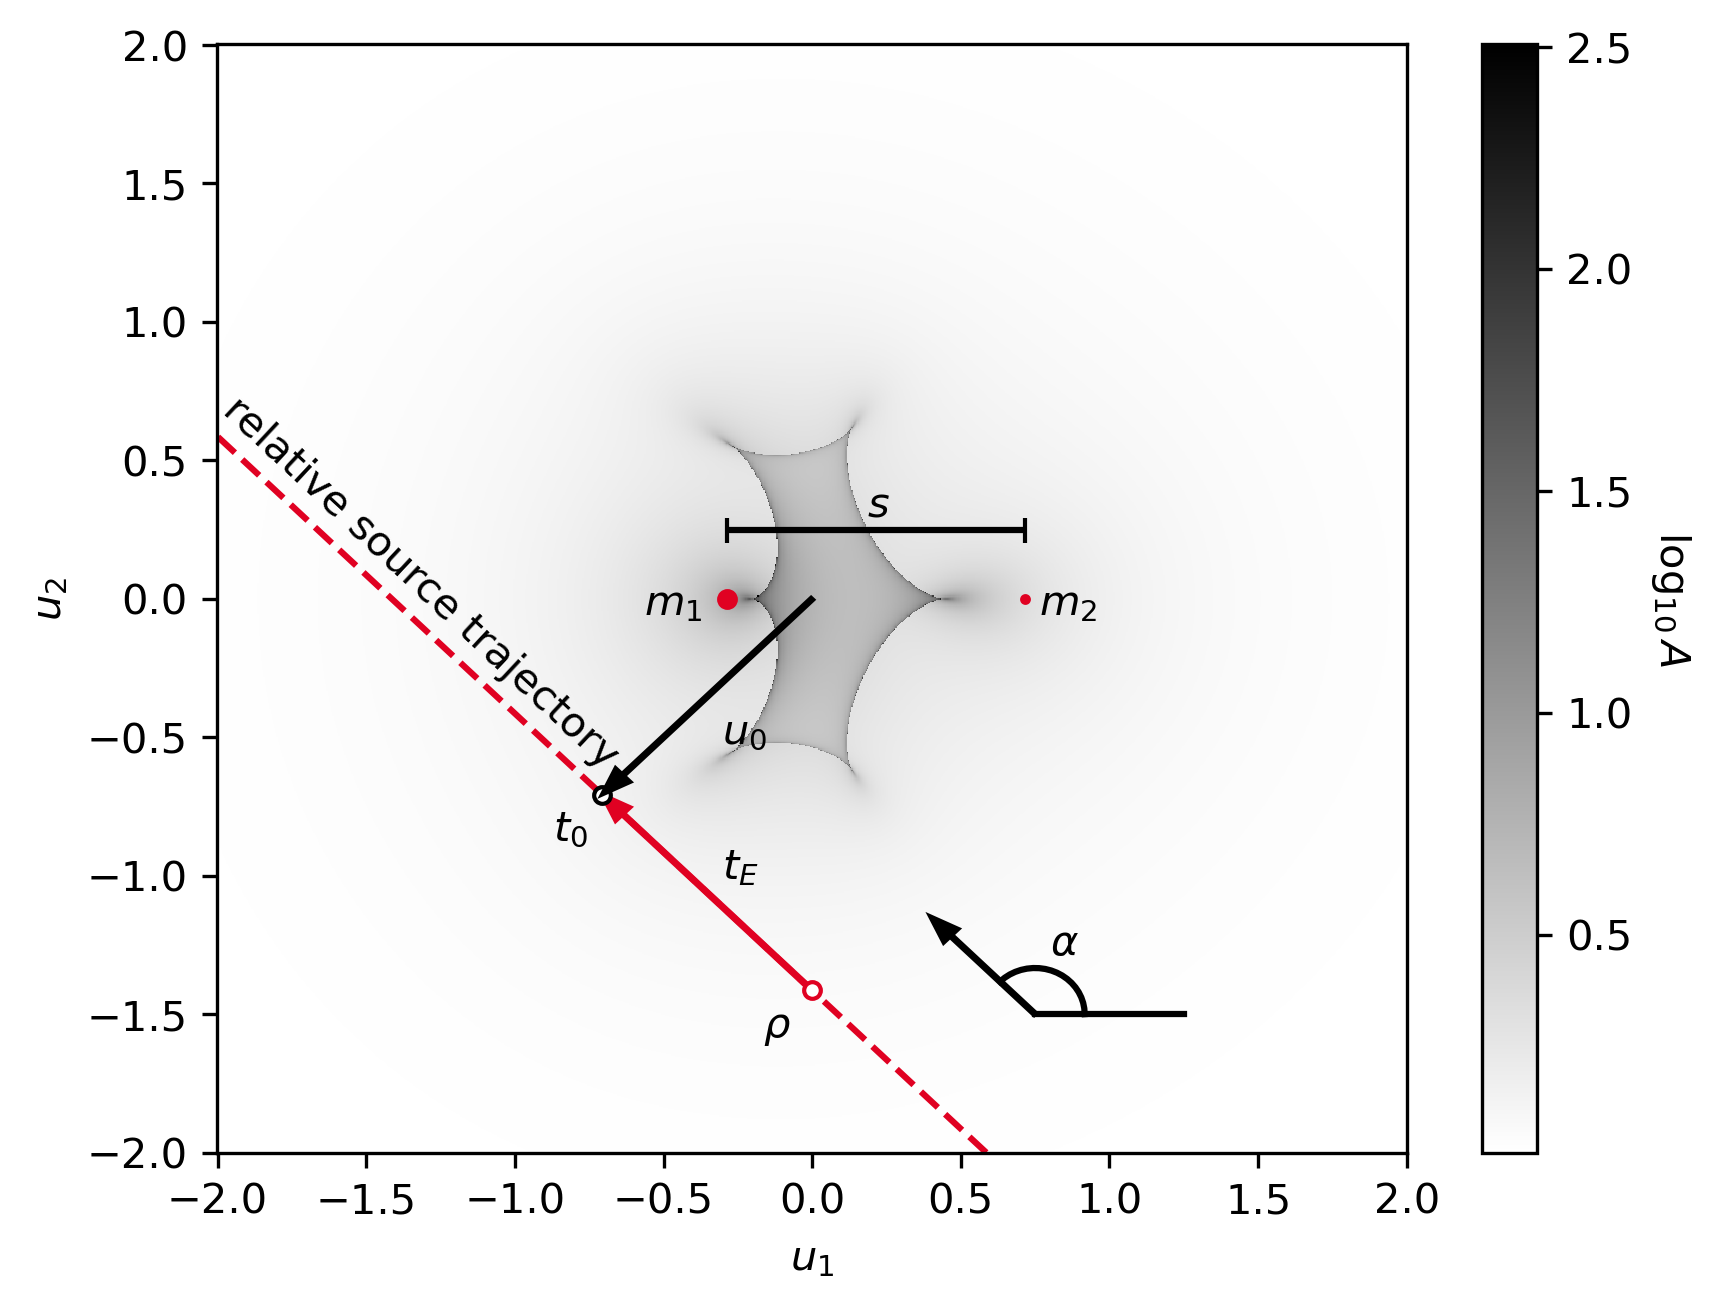

In [163]:
ucred = '#e00122'

# Conversion from centre-of-mass to mid-point coordinates
a = 0.5*s
b = a*(1.0-q)/(1.0+q)
alpha = 3.0*np.pi/4.0
h = b*np.cos(alpha)
u0 = 1.0

fig, ax = plt.subplots(dpi=300)

#mag map
im = ax.pcolormesh(x, y, np.log10(A), cmap="binary") # using pcolormesh instead of imshow
                                                     # because it makes the axis right
buff = 0.05  # padding for text annotations
text_unit = 0.115

#plot trajectory
tx, ty = get_trajectory(u0, alpha, xlims, ylims)  # trajectory data
ax.plot(tx, ty, marker='', ls='--', c=ucred, ms=2, zorder=1)  # trajectory
text_index = int(tx.shape[0]*3.0/4.0+1)  # where to anchor the "relative source traj" label
ax.text(tx[text_index]-0.65, ty[text_index]-0.65, r'relative source trajectory   '\
        , rotation=alpha*180/np.pi-178)  # trajectory text

#plot source and relative direction
u0x, u0y = u0*np.cos(alpha+np.pi/2.0), u0*np.sin(alpha+np.pi/2.0)  # u0, x and y positions
rho_index = int(tx.shape[0]*1.0/3.0)
ax.plot(u0x-np.cos(alpha), u0y-np.sin(alpha), marker='o', markerfacecolor='white'\
        , markeredgecolor=ucred, ms=rho*80)  # source size marker (rho) at -tE
ax.text(u0x-np.cos(alpha) -buff -text_unit, u0y-np.sin(alpha) -buff -text_unit, r'$\rho$')  # rho label
t_len = 0.5
ax.arrow(u0x-np.cos(alpha), u0y-np.sin(alpha), np.cos(alpha), np.sin(alpha)\
            , head_width=0.07, head_length=0.1, length_includes_head=True, width=0.01\
            , color=ucred)
#tE
ax.text(u0x-np.cos(alpha)/2.0 + buff, u0y-np.sin(alpha)/2.0 + buff, r'$t_E$') # tE label

# u0, t0
ax.plot(u0*np.cos(alpha+np.pi/2.0), u0*np.sin(alpha+np.pi/2.0), marker='o'\
        , markerfacecolor='white', markeredgecolor='k', ms=rho*80, zorder=2)  # t0 marker
ax.text(u0x -buff -text_unit\
        , u0y -buff -text_unit, r'$t_0$')  # t0 label
ax.arrow(0, 0, u0x, u0y\
            , head_width=0.07, head_length=0.1, length_includes_head=True, width=0.01\
            , color='k', zorder=3)  # u0 arrow
ax.text(u0x/2.0 +buff \
        , u0y/2.0 -buff -text_unit, r'$u_0$')  # u0 label

# lens masses
ucred = '#e00122'
ax.plot(-a+b, 0, marker='o', c=ucred, ms=4.0)  # lens object 1
ax.text(-a+b -buff -2*text_unit, -text_unit/2.0, r'$m_1$')  # m1 label
ax.plot(a+b, 0, marker='o', c=ucred, ms=4*q)  # lens object 2
ax.text(a+b + buff, -text_unit/2.0, r'$m_2$')  # m2 label
#b is COM
ax.errorbar(b, 0.25,xerr=a,marker='', color='k', capsize=3)  # s measure
ax.text(b-text_unit/4.0, 0.25+buff, r'$s$')  # s label

# angle
angle_origin = [0.75, -1.5]  # where to place the angle picture
#straight parts
angle_len = 0.5  #size of arrow
ax.arrow(angle_origin[0], angle_origin[1], angle_len*np.cos(alpha), angle_len*np.sin(alpha)\
            , head_width=0.07, head_length=0.1, length_includes_head=True, width=0.01\
            , color='k')  # angle arrow
ax.plot([angle_origin[0], angle_origin[0]+angle_len], [angle_origin[1], angle_origin[1]]\
        , color='k', lw=1.5, linestyle='solid')  # lens-axis aligned
#curved part
n_points = 20  # number of point to calculate on the angle curve
curve_angles = np.linspace(0,alpha,n_points)  
curvex = angle_len/3.0*np.cos(curve_angles) + angle_origin[0]
curvey = angle_len/3.0*np.sin(curve_angles) + angle_origin[1]
ax.plot(curvex, curvey, color='k', marker='', lw=1.5, linestyle='-')
#label
ax.text(buff + angle_len/3.0*np.cos(np.pi/2) + angle_origin[0]\
        , buff + angle_len/3.0*np.sin(np.pi/2) + angle_origin[1], r'$\alpha$')

# axis
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$\log_{10}A$', rotation=-90, va="bottom")
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')

# save
plt.savefig('mag_map_and_params.png', bbox_inches='tight')  # 'tight' removes outer padding

# Finite Source Effects

In [26]:
s = 1.0
q = 0.4
rho = 0.05

solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBBinaryLensing.VBBinaryLensing._sols'>
